<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Lab #1: ES models </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 
This is first laboratory task for the course TSA.
The Lab is desinged to impove skills of tuning parameters of ES models and get experience of coding of simple Regression Models.

The Lab should take about 5-6 hours to be completed.

<h1 align="center">Important Info</h1> 
- <span style="font-size: 14pt;"> You must send your solution to the email </span> <span style="color:red; font-size: 12pt;">alexromsput@gmail.com, </span>
- The theme of your message must be <span style="color:red; font-size: 12pt;"> TSA-Erevan-2017-[Your Surname] </span>, for exmaple -- TSA-Erevan-2017-Romanenko,
- You can send ipnb file in attachment or just a link to github. The file in attachment of the letter must be named as <span style="color:red; font-size: 12pt;"> [Surname]-[Group]-Lab1.ipnb</span>, for example -- Romanenko-Evening-Lab1.ipnb,
  
<span style="color:red; font-size: 14pt;"> DEADLINE: 10 June 2017 23:59:59 </span>


<h1 align="center">1. Using ARIMA for wage and electricity comsumption datasets (50%)</h1>
Solve the task for Practice day 2.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

%matplotlib inline

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def qualityMACAPE(x,y):
    # Mean average corrected absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = (2*(x-y).abs()/(x+y)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() 

In [3]:
def my_hash(l, mod=100019, mul=911):
    h = 1
    for x in l:
        h = h*mul + int(x)
        h = h % mod
    return h

<h1 align="center">2. Forecasting of real TS (50%)</h1>
Build the forecast for a dataset  according to the scheme in task 2 (in Practice day 2). You can find the link to dataset that you need to forecast at the sheet 'Lab2' <a href="https://drive.google.com/open?id=11-lzxxR0aeBmEDGEW1GiIaP4X3fyCTHxTg4b0wALpzs">here</a>. 
     


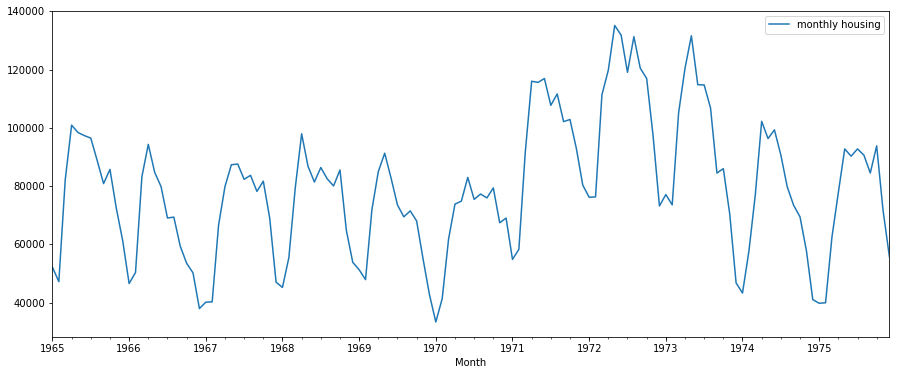

,monthly housing
Month,
1965-01-01,52149
1965-02-01,47205
1965-03-01,82150
1965-04-01,100931
1965-05-01,98408


In [4]:
ts = pd.read_csv('./data/monthly-us-housing-starts-privat.csv', sep=',',  decimal='.', index_col='Month', parse_dates=True)
ts.columns = ['monthly housing']
ts.plot(figsize=(15,6))
plt.show()
ts.head()

In [5]:
ts.shape

(132, 1)

In [6]:
ts_train_point = ts.index[int(ts.shape[0]*0.85)]
ts_train_point

Timestamp('1974-05-01 00:00:00')

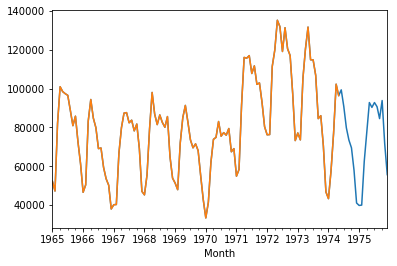

In [7]:
ts['monthly housing'].plot()
ts['monthly housing'].loc[:ts_train_point].plot()

In [60]:
ts['diff seasonal'] = (ts['monthly housing'] - ts['monthly housing'].shift(12))
ts['diff first'] = (ts['monthly housing'] - ts['monthly housing'].shift(1))
ts['diff seasonal2'] = (ts['diff seasonal'] - ts['diff seasonal'].shift(12))
ts['diff first seasonal'] = (ts['diff seasonal'] - ts['diff seasonal'].shift(1))
ts['diff first2 seasonal'] = (ts['diff first seasonal'] - ts['diff first seasonal'].shift(1))
ts['diff first seasonal2'] = (ts['diff seasonal2'] - ts['diff seasonal2'].shift(1))
ts['diff first2 seasonal2'] = (ts['diff first seasonal2'] - ts['diff first seasonal2'].shift(1))

In [9]:
def plot_ACF_PACF(plot_this):
    print('TS: ' + plot_this.name)
    print('\tADF test p-value (low means stationar): %e' % sm.tsa.stattools.adfuller(plot_this.dropna())[1])
    print('\tKPSS test p-value (high means stationar): %f' % sm.tsa.stattools.kpss(plot_this.dropna())[0])
    fig = plt.figure(figsize=(15,6))
    ax0 = fig.add_subplot(311)
    plot_this.plot(ax=ax0, title=plot_this.name)
    ax1 = fig.add_subplot(312)
    fig = sm.graphics.tsa.plot_acf(plot_this, lags=50, ax=ax1)
    ax2 = fig.add_subplot(313)
    fig = sm.graphics.tsa.plot_pacf(plot_this, lags=50, ax=ax2)

### Stationarity test

TS: diff first
	ADF test p-value (low means stationar): 2.868121e-01
	KPSS test p-value (high means stationar): 0.150059
TS: diff seasonal
	ADF test p-value (low means stationar): 2.743150e-01
	KPSS test p-value (high means stationar): 0.106039
TS: diff seasonal2
	ADF test p-value (low means stationar): 5.472008e-01
	KPSS test p-value (high means stationar): 0.096164
TS: diff first seasonal
	ADF test p-value (low means stationar): 9.280443e-03
	KPSS test p-value (high means stationar): 0.068375
TS: diff first2 seasonal
	ADF test p-value (low means stationar): 1.386802e-03
	KPSS test p-value (high means stationar): 0.082336
TS: diff first seasonal2
	ADF test p-value (low means stationar): 1.374269e-02
	KPSS test p-value (high means stationar): 0.072661
TS: diff first2 seasonal2
	ADF test p-value (low means stationar): 1.489772e-03
	KPSS test p-value (high means stationar): 0.102869


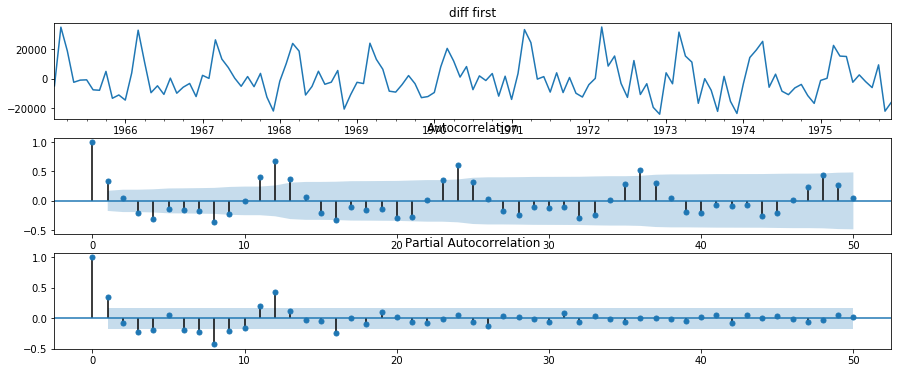

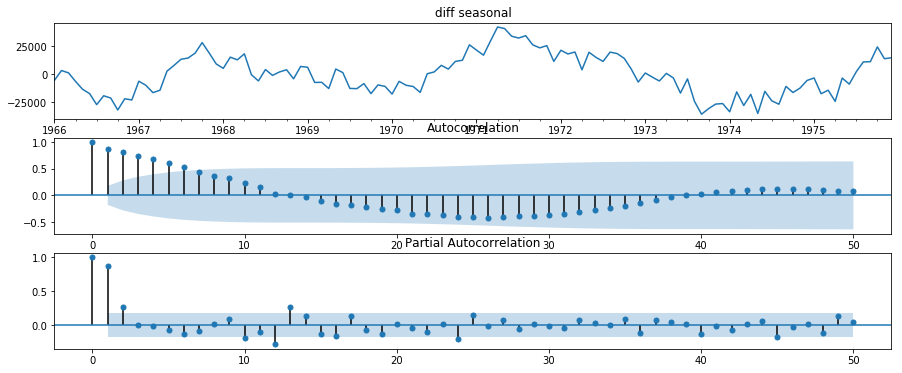

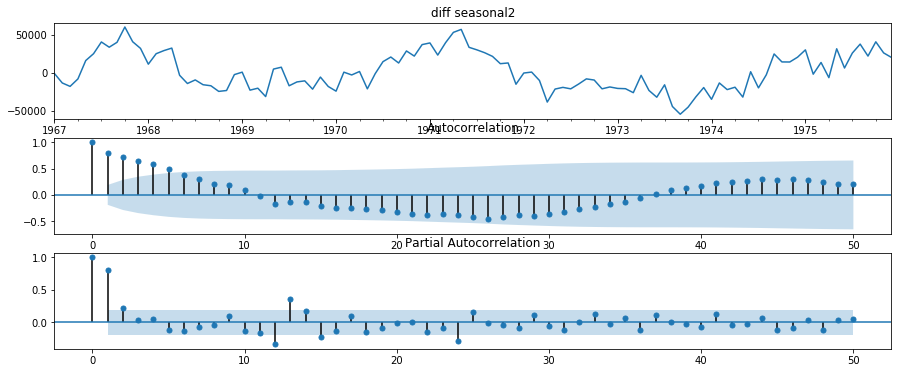

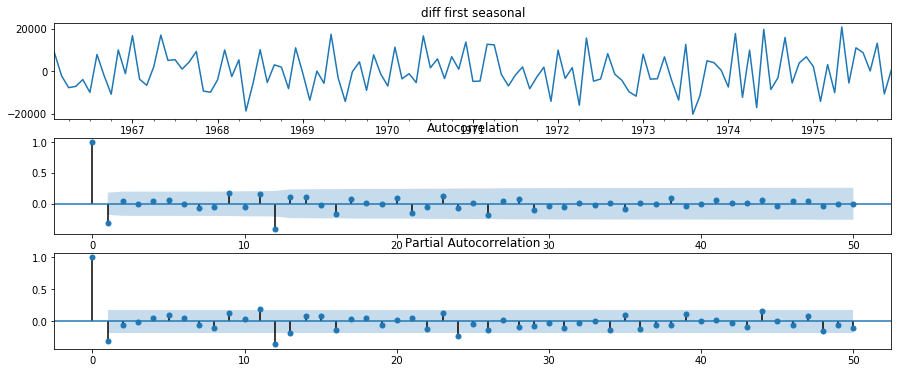

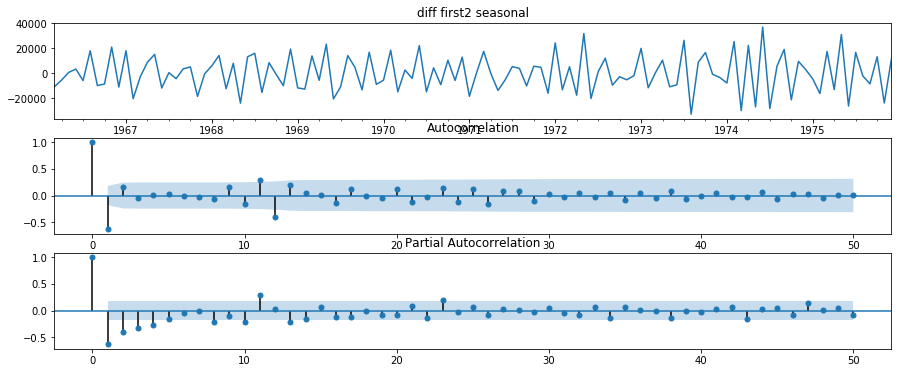

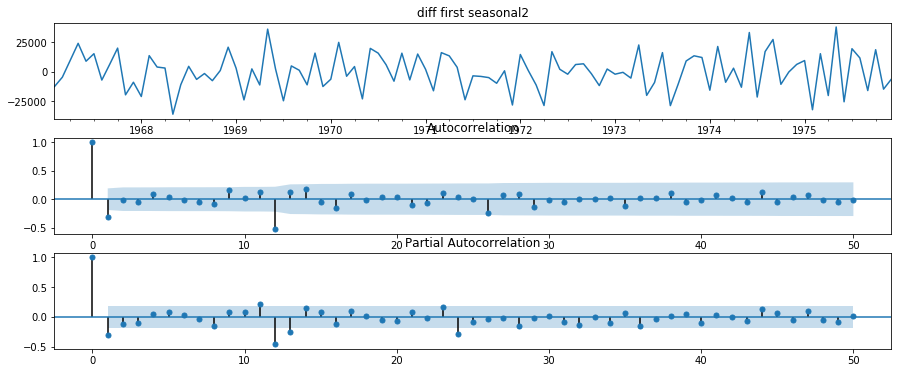

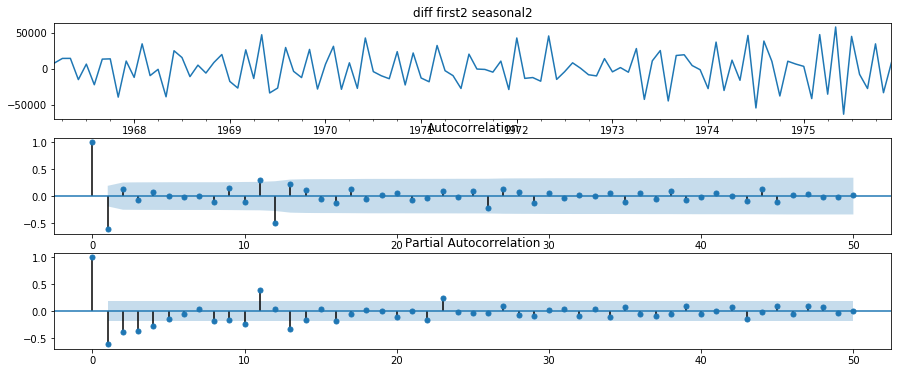

In [61]:
# plot_ACF_PACF(ts_train['monthly housing'].dropna())
plot_ACF_PACF(ts['diff first'].dropna())
plot_ACF_PACF(ts['diff seasonal'].dropna())
plot_ACF_PACF(ts['diff seasonal2'].dropna())
plot_ACF_PACF(ts['diff first seasonal'].dropna())
plot_ACF_PACF(ts['diff first2 seasonal'].dropna())
plot_ACF_PACF(ts['diff first seasonal2'].dropna())
plot_ACF_PACF(ts['diff first2 seasonal2'].dropna())

### try 1 (the best one)

In [73]:
plot_this = ts['diff first seasonal']
print('TS: ' + plot_this.name)
print('\tADF test p-value (low means stationar): \t\t%e' % sm.tsa.stattools.adfuller(plot_this.dropna())[1])
print('\tKPSS test p-value (high means stationar, >0.05): \t%f' % sm.tsa.stattools.kpss(plot_this.dropna())[0])
print('OK')

TS: diff first seasonal
	ADF test p-value (low means stationar): 		9.280443e-03
	KPSS test p-value (high means stationar, >0.05): 	0.068375
OK


In [74]:
sarima_model = sm.tsa.SARIMAX(ts['monthly housing'][:ts_train_point], order=(1,1,1),seasonal_order=(2,1,1,12)).fit()
print(sarima_model.aic, sarima_model.bic, sarima_model.hqic)

(2080.6733514313842, 2097.0376783436582, 2087.3138249324174)


In [75]:
prediction = sarima_model.predict()

In [76]:
forecast = sarima_model.forecast(steps=(ts.index[-1].to_period(freq='M') - ts_train_point.to_period(freq='M')))

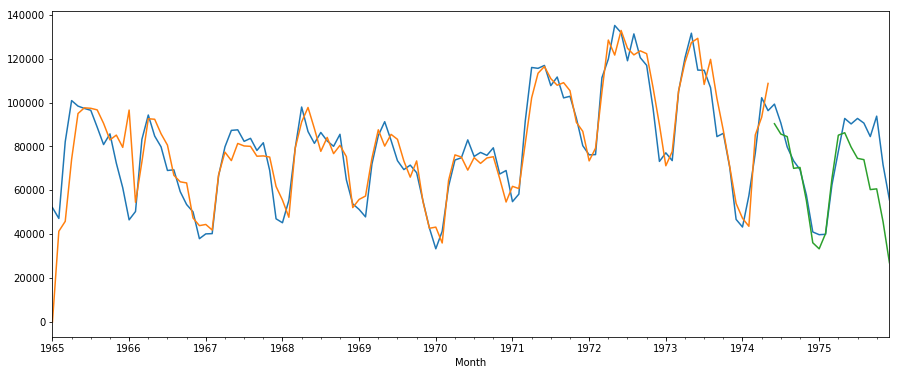

In [77]:
plt.figure(figsize=(15,6))
ts['monthly housing'].plot()
prediction.plot()
forecast.plot()

In [78]:
print('prediction loss: \t%0.4f' % 
      qualityMACAPE(ts['monthly housing'].loc['1968':ts_train_point], prediction['1968':ts_train_point]))
print('forecast loss: \t\t%0.4f' % 
      qualityMACAPE(ts['monthly housing'].loc[ts_train_point:'1975-02'], prediction[ts_train_point:'1975-02']))

prediction loss: 	0.0770
forecast loss: 		0.1209


###### testing residuals

TS: residuals
	ADF test p-value (low means stationar): 1.902335e-16
	KPSS test p-value (high means stationar): 0.096208


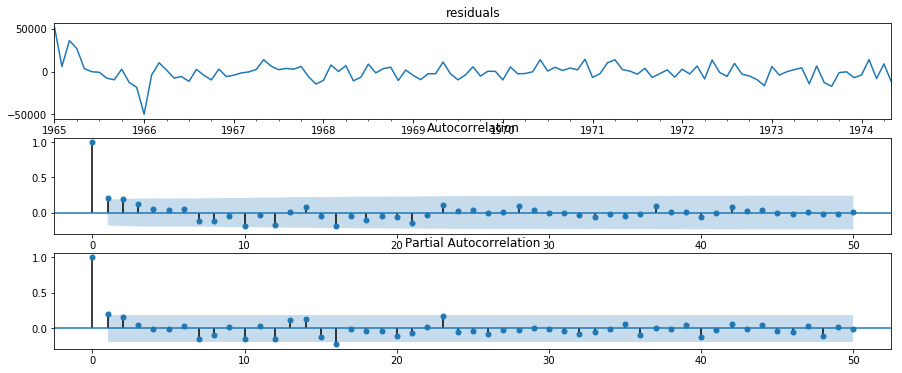

In [81]:
resid = sarima_model.resid
resid.name = 'residuals'
plot_ACF_PACF(resid)

In [92]:
print('Normal test p-value: %e (should be ~1)' %stats.normaltest(resid)[1])
print('Watson test: %f (should be ~2)' %sm.stats.durbin_watson(resid.values))
print('Wilcoxon test: %.2f (should be ~1)' % stats.wilcoxon(resid.values)[1])

Normal test p-value: 4.723864e-08 (should be ~1)
Watson test: 1.378369 (should be ~2)
Wilcoxon test: 0.27 (should be ~1)


this model doesn't satisfy prerequirements of the algorithm, but it works!

### try 2

In [62]:
plot_this = ts['diff first2 seasonal2']
print('TS: ' + plot_this.name)
print('\tADF test p-value (low means stationar): \t\t%e' % sm.tsa.stattools.adfuller(plot_this.dropna())[1])
print('\tKPSS test p-value (high means stationar, >0.05): \t%f' % sm.tsa.stattools.kpss(plot_this.dropna())[0])
print('OK')

TS: diff first2 seasonal2
	ADF test p-value (low means stationar): 		1.489772e-03
	KPSS test p-value (high means stationar, >0.05): 	0.102869
OK


In [69]:
sarima_model = sm.tsa.SARIMAX(ts['monthly housing'][:ts_train_point], order=(4,2,1),seasonal_order=(2,2,1,12)).fit()
print(sarima_model.aic, sarima_model.bic, sarima_model.hqic)

(1886.5385322909704, 1911.0850226593814, 1896.4992425425201)


In [70]:
prediction = sarima_model.predict()

In [71]:
forecast = sarima_model.forecast(steps=(ts.index[-1].to_period(freq='M') - ts_train_point.to_period(freq='M')))

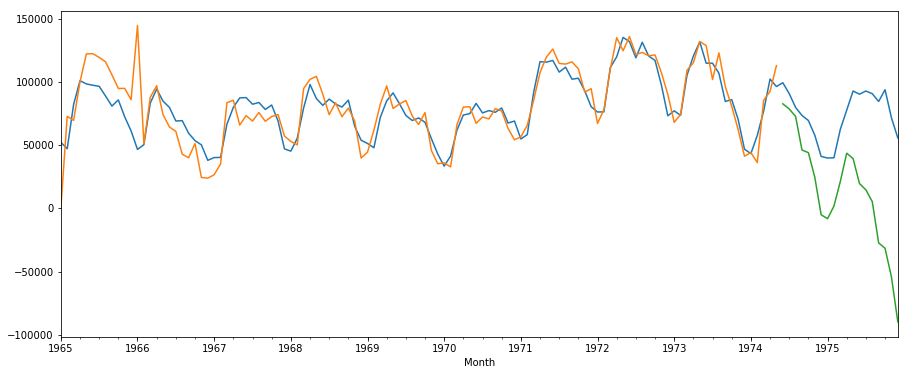

In [72]:
plt.figure(figsize=(15,6))
ts['monthly housing'].plot()
prediction.plot()
forecast.plot()

In [68]:
print('prediction loss: \t%0.4f' % 
      qualityMACAPE(ts['monthly housing'].loc['1968':ts_train_point], prediction['1968':ts_train_point]))
print('forecast loss: \t\t%0.4f' % 
      qualityMACAPE(ts['monthly housing'].loc[ts_train_point:'1975-02'], prediction[ts_train_point:'1975-02']))

prediction loss: 	0.1009
forecast loss: 		0.1660


### searching parameters

In [35]:
param_p = [0,1,2,3]
param_d = [0,1,2]
param_q = [0,1,2,3]
param_P = [0,1,2,3]
param_D = [0,1,2]
param_Q = [0,1,2,3]
param_s = [12,]

In [18]:
Quality = pd.DataFrame(columns=['p','d','q','P','D','Q','s','AIC','MACAPE'])
Quality = Quality[['p','d','q','P','D','Q','s','AIC','MACAPE']]
Quality.index.name = 'hash'

In [19]:
training_series = ts['monthly housing'][:ts_train_point]

In [21]:
import itertools
A = 0
for _ in (itertools.product(param_p, param_d, param_q, param_P, param_D, param_Q, param_s)):
    A = A + 1
for i,(p,d,q,P,D,Q,s) in enumerate(itertools.product(param_p, param_d, param_q, param_P, param_D, param_Q, param_s)):
    try:
        print('TRIAL: %d'%i)

        row = {s:x for x,s in zip((p,d,q,P,D,Q,s), Quality.columns[:7])}
        h = my_hash((p,d,q,P,D,Q,s))
        if any(Quality.index == h):
            print('\t' + 'exsits in Quality, hash: %d' % h)
            continue
        row['AIC'] = 0
        row['MACAPE'] = 0
        sarima_model = sm.tsa.SARIMAX(training_series, order=(p,d,q),seasonal_order=(P,D,Q,s)).fit()
        prediction = sarima_model.predict()
        row['AIC'] = sarima_model.aic
        row['MACAPE'] = qualityMACAPE(training_series, prediction )

        Quality = Quality.append(pd.Series(row, name=h))
        print('trial:%d hash:%d' % (i,h))
        print('\t' + str(row))
    except Exception as ex:
        row['AIC'] = np.nan
        row['MACAPE'] = np.nan
        Quality = Quality.append(pd.Series(row, name=h))
        print('\t' + str(ex))
    print('completed %0.1f%%' % ((i+1)*100.0/A))

TRIAL: 0
	exsits in Quality, hash: 84146
TRIAL: 1
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 0.1%
TRIAL: 2
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 0.1%
TRIAL: 3
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 0.2%
TRIAL: 4
	could not broadcast input array from shape (0,0) into shape (12,12)
completed 0.2%
TRIAL: 5
trial:5 hash:14807
	{'Q': 1, 'd': 0, 'P': 0, 'q': 0, 'p': 0, 's': 12, 'MACAPE': 0.37407626684955042, 'AIC': 2262.7248116993892, 'D': 1}
completed 0.3%
TRIAL: 6
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 0.3%
TRIAL: 7
	maxlag should be < nobs
completed 0.3%
TRIAL: 8
	could not broadcast input array from shape (0,0) into shape (24,24)
completed 0.4%
TRIAL: 9
trial:9 hash:44576
	{'Q': 1

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:27 hash:15680
	{'Q': 3, 'd': 0, 'P': 2, 'q': 0, 'p': 0, 's': 12, 'MACAPE': 0.37402088374312026, 'AIC': 2569.5217046806142, 'D': 0}
completed 1.2%
TRIAL: 28
trial:28 hash:42716
	{'Q': 0, 'd': 0, 'P': 2, 'q': 0, 'p': 0, 's': 12, 'MACAPE': 0.37395467252839437, 'AIC': 2260.5299267633445, 'D': 1}
completed 1.3%
TRIAL: 29
trial:29 hash:43627
	{'Q': 1, 'd': 0, 'P': 2, 'q': 0, 'p': 0, 's': 12, 'MACAPE': 0.37488152440400579, 'AIC': 2261.9940506835119, 'D': 1}
completed 1.3%
TRIAL: 30
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 1.3%
TRIAL: 31
	maxlag should be < nobs
completed 1.4%
TRIAL: 32
trial:32 hash:72485
	{'Q': 0, 'd': 0, 'P': 2, 'q': 0, 'p': 0, 's': 12, 'MACAPE': 0.46487132074338555, 'AIC': 2040.6179245561057, 'D': 2}
completed 1.4%
TRIAL: 33
trial:33 hash:73396
	{'Q': 1, 'd': 0, 'P': 2, 'q': 0, 'p': 0, 's': 12, 'MACAPE': 0.45625211579644825, 'AIC': 2033.6817181692293, 'D': 2}
completed 1.5%
TRIAL: 34
	non-in

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/tsa/statespace/tools.py:405: RuntimeWarning: invalid value encountered in sqrt
  x = r / ((1 - r**2)**0.5)


trial:104 hash:93707
	{'Q': 0, 'd': 0, 'P': 0, 'q': 2, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 4.6%
TRIAL: 105
trial:105 hash:94618
	{'Q': 1, 'd': 0, 'P': 0, 'q': 2, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 4.6%
TRIAL: 106
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 4.6%
TRIAL: 107
	maxlag should be < nobs
completed 4.7%
TRIAL: 108
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 4.7%
TRIAL: 109
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 4.8%
TRIAL: 110
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 4.8%
TRIAL: 111
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 4.9%
TRIAL: 112
trial:112 hash:78348
	{'Q': 0, 'd': 0, 'P': 1, 'q': 2, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan

	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 8.0%
TRIAL: 184
trial:184 hash:32170
	{'Q': 0, 'd': 0, 'P': 3, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 8.0%
TRIAL: 185
trial:185 hash:33081
	{'Q': 1, 'd': 0, 'P': 3, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 8.1%
TRIAL: 186
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 8.1%
TRIAL: 187
	maxlag should be < nobs
completed 8.2%
TRIAL: 188
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 8.2%
TRIAL: 189
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 8.2%
TRIAL: 190
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 8.3%
TRIAL: 191
	maxlag should be < nobs
completed 8.3%
TRIAL: 192
	could not broadcast in

trial:248 hash:58485
	{'Q': 0, 'd': 1, 'P': 0, 'q': 1, 'p': 0, 's': 12, 'MACAPE': -0.1350924068381999, 'AIC': 1932.6320067655636, 'D': 2}
completed 10.8%
TRIAL: 249
trial:249 hash:59396
	{'Q': 1, 'd': 1, 'P': 0, 'q': 1, 'p': 0, 's': 12, 'MACAPE': 0.15491232812462574, 'AIC': 1890.71130219726, 'D': 2}
completed 10.9%
TRIAL: 250
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 10.9%
TRIAL: 251
	maxlag should be < nobs
completed 10.9%
TRIAL: 252
trial:252 hash:13357
	{'Q': 0, 'd': 1, 'P': 1, 'q': 1, 'p': 0, 's': 12, 'MACAPE': 0.1205283439444334, 'AIC': 2397.9303852057442, 'D': 0}
completed 11.0%
TRIAL: 253
trial:253 hash:14268
	{'Q': 1, 'd': 1, 'P': 1, 'q': 1, 'p': 0, 's': 12, 'MACAPE': 0.10832456732399819, 'AIC': 2365.5324193035285, 'D': 0}
completed 11.0%
TRIAL: 254


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:254 hash:15179
	{'Q': 2, 'd': 1, 'P': 1, 'q': 1, 'p': 0, 's': 12, 'MACAPE': 0.1097364106084453, 'AIC': 2390.0664992140973, 'D': 0}
completed 11.1%
TRIAL: 255
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 11.1%
TRIAL: 256
trial:256 hash:43126
	{'Q': 0, 'd': 1, 'P': 1, 'q': 1, 'p': 0, 's': 12, 'MACAPE': 0.11288036377508634, 'AIC': 2080.24714137518, 'D': 1}
completed 11.2%
TRIAL: 257
trial:257 hash:44037
	{'Q': 1, 'd': 1, 'P': 1, 'q': 1, 'p': 0, 's': 12, 'MACAPE': 0.1089382018861858, 'AIC': 2076.6954767975576, 'D': 1}
completed 11.2%
TRIAL: 258
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 11.2%
TRIAL: 259
	maxlag should be < nobs
completed 11.3%
TRIAL: 260
trial:260 hash:72895
	{'Q': 0, 'd': 1, 'P': 1, 'q': 1, 'p': 0, 's': 12, 'MACAPE': 0.17122135181759604, 'AIC': 1904.0745458970437, 'D': 2}
completed 11.3%
TRIAL: 261
trial:261 hash:73806
	

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:302 hash:40200
	{'Q': 2, 'd': 1, 'P': 1, 'q': 2, 'p': 0, 's': 12, 'MACAPE': 0.11114325433903276, 'AIC': 2394.6578532702206, 'D': 0}
completed 13.2%
TRIAL: 303
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 13.2%
TRIAL: 304
trial:304 hash:68147
	{'Q': 0, 'd': 1, 'P': 1, 'q': 2, 'p': 0, 's': 12, 'MACAPE': 0.11285523457240723, 'AIC': 2082.2828638527767, 'D': 1}
completed 13.2%
TRIAL: 305
trial:305 hash:69058
	{'Q': 1, 'd': 1, 'P': 1, 'q': 2, 'p': 0, 's': 12, 'MACAPE': 0.10896392409469088, 'AIC': 2078.8703991019606, 'D': 1}
completed 13.3%
TRIAL: 306
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 13.3%
TRIAL: 307
	maxlag should be < nobs
completed 13.4%
TRIAL: 308
trial:308 hash:97916
	{'Q': 0, 'd': 1, 'P': 1, 'q': 2, 'p': 0, 's': 12, 'MACAPE': 0.17149428155102361, 'AIC': 1905.2446897009129, 'D': 2}
completed 13.4%
TRIAL: 309
trial:309 hash:988

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:350 hash:65221
	{'Q': 2, 'd': 1, 'P': 1, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 0.11086067741069636, 'AIC': 2394.7162440581988, 'D': 0}
completed 15.2%
TRIAL: 351
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 15.3%
TRIAL: 352
trial:352 hash:93168
	{'Q': 0, 'd': 1, 'P': 1, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 0.11315037727056455, 'AIC': 2083.0160468817576, 'D': 1}
completed 15.3%
TRIAL: 353
trial:353 hash:94079
	{'Q': 1, 'd': 1, 'P': 1, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 0.10924005117139805, 'AIC': 2079.8149397461984, 'D': 1}
completed 15.4%
TRIAL: 354
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 15.4%
TRIAL: 355
	maxlag should be < nobs
completed 15.5%
TRIAL: 356
trial:356 hash:22918
	{'Q': 0, 'd': 1, 'P': 1, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 0.17333795123690116, 'AIC': 1905.3774814846188, 'D': 2}
completed 15.5%
TRIAL: 357
trial:357 hash:238

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/tsa/statespace/sarimax.py:928: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/home/ashmat/.miniconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


trial:389 hash:94424
	{'Q': 1, 'd': 2, 'P': 0, 'q': 0, 'p': 0, 's': 12, 'MACAPE': 0.17201762843599455, 'AIC': 2149.0060190950003, 'D': 1}
completed 16.9%
TRIAL: 390
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 17.0%
TRIAL: 391
	maxlag should be < nobs
completed 17.0%
TRIAL: 392
	could not broadcast input array from shape (0,0) into shape (26,26)
completed 17.1%
TRIAL: 393
trial:393 hash:24174
	{'Q': 1, 'd': 2, 'P': 0, 'q': 0, 'p': 0, 's': 12, 'MACAPE': -0.35738358346809196, 'AIC': 1944.8405464353066, 'D': 2}
completed 17.1%
TRIAL: 394
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 17.1%
TRIAL: 395
	maxlag should be < nobs
completed 17.2%
TRIAL: 396
trial:396 hash:78154
	{'Q': 0, 'd': 2, 'P': 1, 'q': 0, 'p': 0, 's': 12, 'MACAPE': 0.17953683154711897, 'AIC': 2436.2731329080912, 'D': 0}
completed 17.2%
TRIAL: 397
trial:397 hash:79065
	{'Q': 1, 'd'

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:422 hash:8777
	{'Q': 2, 'd': 2, 'P': 3, 'q': 0, 'p': 0, 's': 12, 'MACAPE': 0.16527715934354811, 'AIC': 2427.9953787978793, 'D': 0}
completed 18.4%
TRIAL: 423
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 18.4%
TRIAL: 424
trial:424 hash:36724
	{'Q': 0, 'd': 2, 'P': 3, 'q': 0, 'p': 0, 's': 12, 'MACAPE': 0.17461602558034106, 'AIC': 2149.6363913560485, 'D': 1}
completed 18.4%
TRIAL: 425
trial:425 hash:37635
	{'Q': 1, 'd': 2, 'P': 3, 'q': 0, 'p': 0, 's': 12, 'MACAPE': 0.17421993786668719, 'AIC': 2147.2096478987296, 'D': 1}
completed 18.5%
TRIAL: 426
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 18.5%
TRIAL: 427
	maxlag should be < nobs
completed 18.6%
TRIAL: 428
trial:428 hash:66493
	{'Q': 0, 'd': 2, 'P': 3, 'q': 0, 'p': 0, 's': 12, 'MACAPE': 0.88959110212483383, 'AIC': 1937.8398455137174, 'D': 2}
completed 18.6%
TRIAL: 429
trial:429 hash:67404
	{'Q': 1

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:458 hash:19388
	{'Q': 2, 'd': 2, 'P': 2, 'q': 1, 'p': 0, 's': 12, 'MACAPE': 0.11980458675320818, 'AIC': 2393.4131372354177, 'D': 0}
completed 19.9%
TRIAL: 459
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 20.0%
TRIAL: 460
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 20.0%
TRIAL: 461
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 20.1%
TRIAL: 462
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 20.1%
TRIAL: 463
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 20.1%
TRIAL: 464
trial:464 hash:77104
	{'Q': 0, 'd': 2, 'P': 2, 'q': 1, 'p': 0, 's': 12, 'MACAPE': 0.16499343091758092, 'AIC': 1891.9049935942501, 'D': 2}
completed 20.2%
TRIAL: 465
trial:465 hash:78015
	{'Q': 1, 'd': 2, 'P': 2, 'q': 1, 'p': 0, 's': 12, 'MACAPE': 0.15669

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:470 hash:33798
	{'Q': 2, 'd': 2, 'P': 3, 'q': 1, 'p': 0, 's': 12, 'MACAPE': 0.11953451752194891, 'AIC': 2395.3673691809313, 'D': 0}
completed 20.4%
TRIAL: 471
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 20.5%
TRIAL: 472
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 20.5%
TRIAL: 473
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 20.6%
TRIAL: 474
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 20.6%
TRIAL: 475
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 20.7%
TRIAL: 476
trial:476 hash:91514
	{'Q': 0, 'd': 2, 'P': 3, 'q': 1, 'p': 0, 's': 12, 'MACAPE': 0.1590035816873393, 'AIC': 1891.0630519892904, 'D': 2}
completed 20.7%
TRIAL: 477
trial:477 hash:92425
	{'Q': 1, 'd': 2, 'P': 3, 'q': 1, 'p': 0, 's': 12, 'MACAPE': 0.156129

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:517 hash:57908
	{'Q': 1, 'd': 2, 'P': 3, 'q': 2, 'p': 0, 's': 12, 'MACAPE': 0.12133440113265101, 'AIC': 2394.288147663412, 'D': 0}
completed 22.5%
TRIAL: 518
trial:518 hash:58819
	{'Q': 2, 'd': 2, 'P': 3, 'q': 2, 'p': 0, 's': 12, 'MACAPE': 0.12142722559341318, 'AIC': 2396.278784685258, 'D': 0}
completed 22.5%
TRIAL: 519
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 22.6%
TRIAL: 520
trial:520 hash:86766
	{'Q': 0, 'd': 2, 'P': 3, 'q': 2, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 22.6%
TRIAL: 521
trial:521 hash:87677
	{'Q': 1, 'd': 2, 'P': 3, 'q': 2, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 22.7%
TRIAL: 522
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 22.7%
TRIAL: 523
	maxlag should be < nobs
completed 22.7%
TRIAL: 524
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
compl

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:541 hash:54109
	{'Q': 1, 'd': 2, 'P': 1, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 0.12105753709201089, 'AIC': 2389.275922598767, 'D': 0}
completed 23.5%
TRIAL: 542


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:542 hash:55020
	{'Q': 2, 'd': 2, 'P': 1, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 0.12239893961183905, 'AIC': 2391.46361548807, 'D': 0}
completed 23.6%
TRIAL: 543
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 23.6%
TRIAL: 544
trial:544 hash:82967
	{'Q': 0, 'd': 2, 'P': 1, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 23.7%
TRIAL: 545
trial:545 hash:83878
	{'Q': 1, 'd': 2, 'P': 1, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 23.7%
TRIAL: 546
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 23.7%
TRIAL: 547
	maxlag should be < nobs
completed 23.8%
TRIAL: 548
trial:548 hash:12717
	{'Q': 0, 'd': 2, 'P': 1, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 23.8%
TRIAL: 549
trial:549 hash:13628
	{'Q': 1, 'd': 2, 'P': 1, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
comple

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:552 hash:67608
	{'Q': 0, 'd': 2, 'P': 2, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 0.1229151111491838, 'AIC': 2392.1940173179255, 'D': 0}
completed 24.0%
TRIAL: 553


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:553 hash:68519
	{'Q': 1, 'd': 2, 'P': 2, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 0.12123392258333396, 'AIC': 2391.2649149236017, 'D': 0}
completed 24.0%
TRIAL: 554


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:554 hash:69430
	{'Q': 2, 'd': 2, 'P': 2, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 0.12130735678916847, 'AIC': 2393.2524680337492, 'D': 0}
completed 24.1%
TRIAL: 555
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 24.1%
TRIAL: 556
trial:556 hash:97377
	{'Q': 0, 'd': 2, 'P': 2, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 24.2%
TRIAL: 557
trial:557 hash:98288
	{'Q': 1, 'd': 2, 'P': 2, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 24.2%
TRIAL: 558
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 24.3%
TRIAL: 559
	maxlag should be < nobs
completed 24.3%
TRIAL: 560
trial:560 hash:27127
	{'Q': 0, 'd': 2, 'P': 2, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 24.3%
TRIAL: 561
trial:561 hash:28038
	{'Q': 1, 'd': 2, 'P': 2, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 24.4

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:564 hash:82018
	{'Q': 0, 'd': 2, 'P': 3, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 0.12158122662751583, 'AIC': 2392.8365950819921, 'D': 0}
completed 24.5%
TRIAL: 565
trial:565 hash:82929
	{'Q': 1, 'd': 2, 'P': 3, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 0.12123046215545383, 'AIC': 2393.2629677670052, 'D': 0}
completed 24.6%
TRIAL: 566


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:566 hash:83840
	{'Q': 2, 'd': 2, 'P': 3, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 0.12115211159195236, 'AIC': 2395.2493438981842, 'D': 0}
completed 24.6%
TRIAL: 567
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 24.7%
TRIAL: 568
trial:568 hash:11768
	{'Q': 0, 'd': 2, 'P': 3, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 24.7%
TRIAL: 569
trial:569 hash:12679
	{'Q': 1, 'd': 2, 'P': 3, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 24.7%
TRIAL: 570
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 24.8%
TRIAL: 571
	maxlag should be < nobs
completed 24.8%
TRIAL: 572
trial:572 hash:41537
	{'Q': 0, 'd': 2, 'P': 3, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 24.9%
TRIAL: 573
trial:573 hash:42448
	{'Q': 1, 'd': 2, 'P': 3, 'q': 3, 'p': 0, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 24.9

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:615 hash:38746
	{'Q': 3, 'd': 0, 'P': 3, 'q': 0, 'p': 1, 's': 12, 'MACAPE': 0.10674541665602937, 'AIC': 2421.2759496748308, 'D': 0}
completed 26.7%
TRIAL: 616
trial:616 hash:65782
	{'Q': 0, 'd': 0, 'P': 3, 'q': 0, 'p': 1, 's': 12, 'MACAPE': 0.12242068998181839, 'AIC': 2130.1997036516573, 'D': 1}
completed 26.8%
TRIAL: 617
trial:617 hash:66693
	{'Q': 1, 'd': 0, 'P': 3, 'q': 0, 'p': 1, 's': 12, 'MACAPE': 0.12160059898230981, 'AIC': 2130.747127179839, 'D': 1}
completed 26.8%
TRIAL: 618
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 26.9%
TRIAL: 619
	maxlag should be < nobs
completed 26.9%
TRIAL: 620
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 27.0%
TRIAL: 621
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 27.0%
TRIAL: 622
	Non-stationary starting autoregressive parameters found with `enforce_stationa

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:649 hash:47535
	{'Q': 1, 'd': 0, 'P': 2, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.10106286973740491, 'AIC': 2361.3006513858522, 'D': 0}
completed 28.2%
TRIAL: 650


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:650 hash:48446
	{'Q': 2, 'd': 0, 'P': 2, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.10126981843409136, 'AIC': 2403.5772182136561, 'D': 0}
completed 28.3%
TRIAL: 651
trial:651 hash:49357
	{'Q': 3, 'd': 0, 'P': 2, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.10109458210027962, 'AIC': 2405.5120267463822, 'D': 0}
completed 28.3%
TRIAL: 652
trial:652 hash:76393
	{'Q': 0, 'd': 0, 'P': 2, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.12317954094540778, 'AIC': 2129.7005446641751, 'D': 1}
completed 28.3%
TRIAL: 653
trial:653 hash:77304
	{'Q': 1, 'd': 0, 'P': 2, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.12097620872810878, 'AIC': 2128.2119840579703, 'D': 1}
completed 28.4%
TRIAL: 654
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 28.4%
TRIAL: 655
	maxlag should be < nobs
completed 28.5%
TRIAL: 656
trial:656 hash:6143
	{'Q': 0, 'd': 0, 'P': 2, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.14529409333060558, 'AIC': 1917.4319246487903, 'D': 2}
completed 28.5%


trial:712 hash:15805
	{'Q': 0, 'd': 0, 'P': 3, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.12038282257995264, 'AIC': 2130.9019039093478, 'D': 1}
completed 30.9%
TRIAL: 713
trial:713 hash:16716
	{'Q': 1, 'd': 0, 'P': 3, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.11923882019916371, 'AIC': 2131.507036518587, 'D': 1}
completed 31.0%
TRIAL: 714
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 31.0%
TRIAL: 715
	maxlag should be < nobs
completed 31.1%
TRIAL: 716
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 31.1%
TRIAL: 717
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 31.2%
TRIAL: 718
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 31.2%
TRIAL: 719
	maxlag should be < nobs
completed 31.2%
TRIAL: 720
trial:720 hash:67846
	{'Q': 0, 'd': 0, 'P': 0, 'q': 3, 'p': 1, 's':

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:747 hash:99399
	{'Q': 3, 'd': 0, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.1007977365785039, 'AIC': 2411.7634839045645, 'D': 0}
completed 32.5%
TRIAL: 748
trial:748 hash:26416
	{'Q': 0, 'd': 0, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.12107238122477477, 'AIC': 2133.3680440462049, 'D': 1}
completed 32.5%
TRIAL: 749
trial:749 hash:27327
	{'Q': 1, 'd': 0, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.11905247334539461, 'AIC': 2131.8157659281101, 'D': 1}
completed 32.6%
TRIAL: 750
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 32.6%
TRIAL: 751
	maxlag should be < nobs
completed 32.6%
TRIAL: 752
trial:752 hash:56185
	{'Q': 0, 'd': 0, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.14426007039287869, 'AIC': 1917.7670194928212, 'D': 2}
completed 32.7%
TRIAL: 753
trial:753 hash:57096
	{'Q': 1, 'd': 0, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.14109494021246388, 'AIC': 1913.4734402543502, 'D': 2}
completed 32.7%


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:759 hash:13790
	{'Q': 3, 'd': 0, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.10177072474322617, 'AIC': 2414.7492058287162, 'D': 0}
completed 33.0%
TRIAL: 760
trial:760 hash:40826
	{'Q': 0, 'd': 0, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.12006297854798094, 'AIC': 2132.9105654690602, 'D': 1}
completed 33.0%
TRIAL: 761
trial:761 hash:41737
	{'Q': 1, 'd': 0, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.11906693077064505, 'AIC': 2133.5088419475901, 'D': 1}
completed 33.1%
TRIAL: 762
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 33.1%
TRIAL: 763
	maxlag should be < nobs
completed 33.2%
TRIAL: 764
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 33.2%
TRIAL: 765
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 33.2%
TRIAL: 766
	Non-stationary starting autoregressive parameters found with `enforce_station

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:801 hash:71851
	{'Q': 1, 'd': 1, 'P': 2, 'q': 0, 'p': 1, 's': 12, 'MACAPE': 0.13602212205886891, 'AIC': 1864.7933822856444, 'D': 2}
completed 34.8%
TRIAL: 802
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 34.9%
TRIAL: 803
	maxlag should be < nobs
completed 34.9%
TRIAL: 804
trial:804 hash:25812
	{'Q': 0, 'd': 1, 'P': 3, 'q': 0, 'p': 1, 's': 12, 'MACAPE': 0.10897598851768785, 'AIC': 2394.5610993115797, 'D': 0}
completed 34.9%
TRIAL: 805
trial:805 hash:26723
	{'Q': 1, 'd': 1, 'P': 3, 'q': 0, 'p': 1, 's': 12, 'MACAPE': 0.10924207850698704, 'AIC': 2394.5121226742904, 'D': 0}
completed 35.0%
TRIAL: 806
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 35.0%
TRIAL: 807
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 35.1%
TRIAL: 808
trial:808 hash:55581
	{'Q': 0, 'd': 1, 'P': 3, 'q': 0, 'p': 1, 's': 

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:830 hash:23835
	{'Q': 2, 'd': 1, 'P': 1, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.11045204918195636, 'AIC': 2393.1959922919596, 'D': 0}
completed 36.1%
TRIAL: 831
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 36.1%
TRIAL: 832
trial:832 hash:51782
	{'Q': 0, 'd': 1, 'P': 1, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.11285021586223332, 'AIC': 2082.1750822890958, 'D': 1}
completed 36.2%
TRIAL: 833
trial:833 hash:52693
	{'Q': 1, 'd': 1, 'P': 1, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.10894621776262127, 'AIC': 2078.6818276761137, 'D': 1}
completed 36.2%
TRIAL: 834
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 36.2%
TRIAL: 835
	maxlag should be < nobs
completed 36.3%
TRIAL: 836
trial:836 hash:81551
	{'Q': 0, 'd': 1, 'P': 1, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.17133240865976912, 'AIC': 1905.4108826305051, 'D': 2}
completed 36.3%
TRIAL: 837
trial:837 hash:824

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:878 hash:48856
	{'Q': 2, 'd': 1, 'P': 1, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.11151530683259739, 'AIC': 2395.9316684953719, 'D': 0}
completed 38.2%
TRIAL: 879
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 38.2%
TRIAL: 880
trial:880 hash:76803
	{'Q': 0, 'd': 1, 'P': 1, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 38.2%
TRIAL: 881
trial:881 hash:77714
	{'Q': 1, 'd': 1, 'P': 1, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 38.3%
TRIAL: 882
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 38.3%
TRIAL: 883
	maxlag should be < nobs
completed 38.4%
TRIAL: 884
trial:884 hash:6553
	{'Q': 0, 'd': 1, 'P': 1, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.17168640996530854, 'AIC': 1906.9643180217317, 'D': 2}
completed 38.4%
TRIAL: 885
trial:885 hash:7464
	{'Q': 1, 'd': 1, 'P': 1, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:889 hash:62355
	{'Q': 1, 'd': 1, 'P': 2, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.10846568626564929, 'AIC': 2371.2563491510082, 'D': 0}
completed 38.6%
TRIAL: 890
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 38.7%
TRIAL: 891
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 38.7%
TRIAL: 892
trial:892 hash:91213
	{'Q': 0, 'd': 1, 'P': 2, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 38.8%
TRIAL: 893
trial:893 hash:92124
	{'Q': 1, 'd': 1, 'P': 2, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 38.8%
TRIAL: 894
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 38.8%
TRIAL: 895
	maxlag should be < nobs
completed 38.9%
TRIAL: 896


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:896 hash:20963
	{'Q': 0, 'd': 1, 'P': 2, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.14185405855363126, 'AIC': 1888.5887495332972, 'D': 2}
completed 38.9%
TRIAL: 897
trial:897 hash:21874
	{'Q': 1, 'd': 1, 'P': 2, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.14007105578342452, 'AIC': 1893.947858032981, 'D': 2}
completed 39.0%
TRIAL: 898
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 39.0%
TRIAL: 899
	maxlag should be < nobs
completed 39.1%
TRIAL: 900
trial:900 hash:75854
	{'Q': 0, 'd': 1, 'P': 3, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.10981273105343317, 'AIC': 2395.7774735081121, 'D': 0}
completed 39.1%
TRIAL: 901
trial:901 hash:76765
	{'Q': 1, 'd': 1, 'P': 3, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.1100232781153014, 'AIC': 2395.8038472195281, 'D': 0}
completed 39.1%
TRIAL: 902
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 39.2%
TRIAL: 903
	Non-stationary starting autor

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:908 hash:35373
	{'Q': 0, 'd': 1, 'P': 3, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.14101222553431392, 'AIC': 1888.8364399138329, 'D': 2}
completed 39.5%
TRIAL: 909
trial:909 hash:36284
	{'Q': 1, 'd': 1, 'P': 3, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.13989927358079396, 'AIC': 1895.9254450459794, 'D': 2}
completed 39.5%
TRIAL: 910
trial:910 hash:37195
	{'Q': 2, 'd': 1, 'P': 3, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.1387634541136594, 'AIC': 1897.6931127996654, 'D': 2}
completed 39.5%
TRIAL: 911
	maxlag should be < nobs
completed 39.6%
TRIAL: 912
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 39.6%
TRIAL: 913
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 39.7%
TRIAL: 914
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 39.7%
TRIAL: 915
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 39.8%
TRIAL: 91

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:916 hash:87414
	{'Q': 0, 'd': 1, 'P': 0, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.123764071044019, 'AIC': 2097.2980784471411, 'D': 1}
completed 39.8%
TRIAL: 917


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:917 hash:88325
	{'Q': 1, 'd': 1, 'P': 0, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.11111633477345469, 'AIC': 2078.1965354030262, 'D': 1}
completed 39.8%
TRIAL: 918
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 39.9%
TRIAL: 919
	maxlag should be < nobs
completed 39.9%
TRIAL: 920
trial:920 hash:17164
	{'Q': 0, 'd': 1, 'P': 0, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.50964569595232945, 'AIC': 1926.1406161342934, 'D': 2}
completed 40.0%
TRIAL: 921


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:921 hash:18075
	{'Q': 1, 'd': 1, 'P': 0, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.15375173316311419, 'AIC': 1891.032725910577, 'D': 2}
completed 40.0%
TRIAL: 922
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 40.1%
TRIAL: 923
	maxlag should be < nobs
completed 40.1%
TRIAL: 924
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 40.1%
TRIAL: 925
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 40.2%
TRIAL: 926
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 40.2%
TRIAL: 927
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 40.3%
TRIAL: 928


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:928 hash:1805
	{'Q': 0, 'd': 1, 'P': 1, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.11287271177006196, 'AIC': 2082.9011834542339, 'D': 1}
completed 40.3%
TRIAL: 929


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:929 hash:2716
	{'Q': 1, 'd': 1, 'P': 1, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.10955529201554913, 'AIC': 2080.7537377250651, 'D': 1}
completed 40.4%
TRIAL: 930
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 40.4%
TRIAL: 931
	maxlag should be < nobs
completed 40.5%
TRIAL: 932


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:932 hash:31574
	{'Q': 0, 'd': 1, 'P': 1, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.2016861039234899, 'AIC': 1903.1540873253321, 'D': 2}
completed 40.5%
TRIAL: 933


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:933 hash:32485
	{'Q': 1, 'd': 1, 'P': 1, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.14165418322906789, 'AIC': 1892.3131528318027, 'D': 2}
completed 40.5%
TRIAL: 934
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 40.6%
TRIAL: 935
	maxlag should be < nobs
completed 40.6%
TRIAL: 936
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 40.7%
TRIAL: 937
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 40.7%
TRIAL: 938
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 40.8%
TRIAL: 939
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 40.8%
TRIAL: 940


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:940 hash:16215
	{'Q': 0, 'd': 1, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.11138803741565809, 'AIC': 2082.3598784747824, 'D': 1}
completed 40.8%
TRIAL: 941


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:941 hash:17126
	{'Q': 1, 'd': 1, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.10967244050933982, 'AIC': 2082.7250364586125, 'D': 1}
completed 40.9%
TRIAL: 942
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 40.9%
TRIAL: 943
	maxlag should be < nobs
completed 41.0%
TRIAL: 944


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:944 hash:45984
	{'Q': 0, 'd': 1, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.14958867123858438, 'AIC': 1897.5096235079675, 'D': 2}
completed 41.0%
TRIAL: 945


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:945 hash:46895
	{'Q': 1, 'd': 1, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.14071675881808229, 'AIC': 1893.684946634577, 'D': 2}
completed 41.1%
TRIAL: 946
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 41.1%
TRIAL: 947
	maxlag should be < nobs
completed 41.1%
TRIAL: 948
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 41.2%
TRIAL: 949
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 41.2%
TRIAL: 950
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 41.3%
TRIAL: 951
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 41.3%
TRIAL: 952


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:952 hash:30625
	{'Q': 0, 'd': 1, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.11107857386812418, 'AIC': 2083.6948378642546, 'D': 1}
completed 41.4%
TRIAL: 953


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:953 hash:31536
	{'Q': 1, 'd': 1, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.1095510366600824, 'AIC': 2084.5956842619744, 'D': 1}
completed 41.4%
TRIAL: 954
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 41.4%
TRIAL: 955
	maxlag should be < nobs
completed 41.5%
TRIAL: 956


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:956 hash:60394
	{'Q': 0, 'd': 1, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.14401257873270251, 'AIC': 1896.1797298108777, 'D': 2}
completed 41.5%
TRIAL: 957


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:957 hash:61305
	{'Q': 1, 'd': 1, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.14066646763398322, 'AIC': 1895.6570334867397, 'D': 2}
completed 41.6%
TRIAL: 958


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:958 hash:62216
	{'Q': 2, 'd': 1, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.13912288732546388, 'AIC': 1897.4548942012116, 'D': 2}
completed 41.6%
TRIAL: 959
	maxlag should be < nobs
completed 41.7%
TRIAL: 960
trial:960 hash:72400
	{'Q': 0, 'd': 2, 'P': 0, 'q': 0, 'p': 1, 's': 12, 'MACAPE': 0.17756945637987756, 'AIC': 2445.2897708641999, 'D': 0}
completed 41.7%
TRIAL: 961
trial:961 hash:73311
	{'Q': 1, 'd': 2, 'P': 0, 'q': 0, 'p': 1, 's': 12, 'MACAPE': 0.16661134823544566, 'AIC': 2425.5562246714853, 'D': 0}
completed 41.8%
TRIAL: 962
trial:962 hash:74222
	{'Q': 2, 'd': 2, 'P': 0, 'q': 0, 'p': 1, 's': 12, 'MACAPE': 0.15017936732012457, 'AIC': 2418.4688195420658, 'D': 0}
completed 41.8%
TRIAL: 963
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 41.8%
TRIAL: 964
trial:964 hash:2150
	{'Q': 0, 'd': 2, 'P': 0, 'q': 0, 'p': 1, 's': 12, 'MACAPE': 0.17223638576018385, 'AIC': 2138.7054226315631, 'D': 1}
completed 41.9%


trial:1021 hash:12723
	{'Q': 1, 'd': 2, 'P': 1, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.12172584552838642, 'AIC': 2390.7494734059806, 'D': 0}
completed 44.4%
TRIAL: 1022
trial:1022 hash:13634
	{'Q': 2, 'd': 2, 'P': 1, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.12172992958260381, 'AIC': 2392.7494191694068, 'D': 0}
completed 44.4%
TRIAL: 1023
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 44.4%
TRIAL: 1024
trial:1024 hash:41581
	{'Q': 0, 'd': 2, 'P': 1, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.11918096750043516, 'AIC': 2074.4578395250451, 'D': 1}
completed 44.5%
TRIAL: 1025
trial:1025 hash:42492
	{'Q': 1, 'd': 2, 'P': 1, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.11648203154042459, 'AIC': 2072.0312136532511, 'D': 1}
completed 44.5%
TRIAL: 1026
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 44.6%
TRIAL: 1027
	maxlag should be < nobs
completed 44.6%
TRIAL: 1028
trial:1

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1029 hash:72261
	{'Q': 1, 'd': 2, 'P': 1, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.15164236619791263, 'AIC': 1850.5131732049556, 'D': 2}
completed 44.7%
TRIAL: 1030
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 44.7%
TRIAL: 1031
	maxlag should be < nobs
completed 44.8%
TRIAL: 1032
trial:1032 hash:26222
	{'Q': 0, 'd': 2, 'P': 2, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.12287267643726939, 'AIC': 2393.6072644969008, 'D': 0}
completed 44.8%
TRIAL: 1033


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1033 hash:27133
	{'Q': 1, 'd': 2, 'P': 2, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.12274707106520741, 'AIC': 2370.7460849904096, 'D': 0}
completed 44.9%
TRIAL: 1034


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1034 hash:28044
	{'Q': 2, 'd': 2, 'P': 2, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.1216782603906038, 'AIC': 2394.6535417932469, 'D': 0}
completed 44.9%
TRIAL: 1035
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 45.0%
TRIAL: 1036
trial:1036 hash:55991
	{'Q': 0, 'd': 2, 'P': 2, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.11813254803956184, 'AIC': 2073.7122499749867, 'D': 1}
completed 45.0%
TRIAL: 1037
trial:1037 hash:56902
	{'Q': 1, 'd': 2, 'P': 2, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.11639063731513054, 'AIC': 2074.026433113715, 'D': 1}
completed 45.1%
TRIAL: 1038
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 45.1%
TRIAL: 1039
	maxlag should be < nobs
completed 45.1%
TRIAL: 1040
trial:1040 hash:85760
	{'Q': 0, 'd': 2, 'P': 2, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.16113535355868622, 'AIC': 1890.5297591141227, 'D': 2}
completed 45.2%
TRIAL: 1041
trial:1041 hash:866

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1046 hash:42454
	{'Q': 2, 'd': 2, 'P': 3, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.12133285077218017, 'AIC': 2396.6667934132242, 'D': 0}
completed 45.4%
TRIAL: 1047
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 45.5%
TRIAL: 1048
trial:1048 hash:70401
	{'Q': 0, 'd': 2, 'P': 3, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.11736062745783543, 'AIC': 2074.9909402077824, 'D': 1}
completed 45.5%
TRIAL: 1049
trial:1049 hash:71312
	{'Q': 1, 'd': 2, 'P': 3, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.11642067665059962, 'AIC': 2075.9995113713931, 'D': 1}
completed 45.6%
TRIAL: 1050
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 45.6%
TRIAL: 1051
	maxlag should be < nobs
completed 45.7%
TRIAL: 1052
trial:1052 hash:151
	{'Q': 0, 'd': 2, 'P': 3, 'q': 1, 'p': 1, 's': 12, 'MACAPE': 0.15620923582185561, 'AIC': 1889.9838316248267, 'D': 2}
completed 45.7%
TRIAL: 1053
trial:1053 hash:106

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1057 hash:23334
	{'Q': 1, 'd': 2, 'P': 0, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.14847074266518762, 'AIC': 2408.0049944624839, 'D': 0}
completed 45.9%
TRIAL: 1058


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1058 hash:24245
	{'Q': 2, 'd': 2, 'P': 0, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.13827447211146043, 'AIC': 2403.8714770816623, 'D': 0}
completed 46.0%
TRIAL: 1059
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 46.0%
TRIAL: 1060
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 46.1%
TRIAL: 1061
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 46.1%
TRIAL: 1062
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 46.1%
TRIAL: 1063
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 46.2%
TRIAL: 1064
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 46.2%
TRIAL: 1065
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 46.3%
TRIAL: 1066
	non-in

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1068 hash:36833
	{'Q': 0, 'd': 2, 'P': 1, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.13106620047642736, 'AIC': 2397.6434419093152, 'D': 0}
completed 46.4%
TRIAL: 1069


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1069 hash:37744
	{'Q': 1, 'd': 2, 'P': 1, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.12175675840527063, 'AIC': 2392.1142338354362, 'D': 0}
completed 46.4%
TRIAL: 1070


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1070 hash:38655
	{'Q': 2, 'd': 2, 'P': 1, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.12158672261034453, 'AIC': 2394.143707665422, 'D': 0}
completed 46.5%
TRIAL: 1071
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 46.5%
TRIAL: 1072
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 46.6%
TRIAL: 1073
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 46.6%
TRIAL: 1074
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 46.7%
TRIAL: 1075
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 46.7%
TRIAL: 1076
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 46.7%
TRIAL: 1077
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 46.8%
TRIAL: 1078
	non-inv

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1080 hash:51243
	{'Q': 0, 'd': 2, 'P': 2, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.12269828301874273, 'AIC': 2394.9943849422652, 'D': 0}
completed 46.9%
TRIAL: 1081


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1081 hash:52154
	{'Q': 1, 'd': 2, 'P': 2, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.12138713114588957, 'AIC': 2394.1422517701903, 'D': 0}
completed 47.0%
TRIAL: 1082


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1082 hash:53065
	{'Q': 2, 'd': 2, 'P': 2, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.1216832419546803, 'AIC': 2396.1142068353679, 'D': 0}
completed 47.0%
TRIAL: 1083
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 47.0%
TRIAL: 1084
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 47.1%
TRIAL: 1085
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 47.1%
TRIAL: 1086
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 47.2%
TRIAL: 1087
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 47.2%
TRIAL: 1088
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 47.3%
TRIAL: 1089
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 47.3%
TRIAL: 1090
	non-invertible st

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1092 hash:65653
	{'Q': 0, 'd': 2, 'P': 3, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.12146179422412115, 'AIC': 2395.664260676002, 'D': 0}
completed 47.4%
TRIAL: 1093


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1093 hash:66564
	{'Q': 1, 'd': 2, 'P': 3, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.12144039563721463, 'AIC': 2396.1335352962255, 'D': 0}
completed 47.5%
TRIAL: 1094


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1094 hash:67475
	{'Q': 2, 'd': 2, 'P': 3, 'q': 2, 'p': 1, 's': 12, 'MACAPE': 0.1216517950181636, 'AIC': 2398.1196347007226, 'D': 0}
completed 47.5%
TRIAL: 1095
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 47.6%
TRIAL: 1096
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 47.6%
TRIAL: 1097
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 47.7%
TRIAL: 1098
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 47.7%
TRIAL: 1099
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 47.7%
TRIAL: 1100
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 47.8%
TRIAL: 1101
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 47.8%
TRIAL: 1102
	non-invertible st

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1104 hash:47444
	{'Q': 0, 'd': 2, 'P': 0, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.15280282940795681, 'AIC': 2421.9461555635253, 'D': 0}
completed 48.0%
TRIAL: 1105
trial:1105 hash:48355
	{'Q': 1, 'd': 2, 'P': 0, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.14744705513044146, 'AIC': 2407.6457349526991, 'D': 0}
completed 48.0%
TRIAL: 1106


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1106 hash:49266
	{'Q': 2, 'd': 2, 'P': 0, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.13612378849326198, 'AIC': 2403.1480639841116, 'D': 0}
completed 48.0%
TRIAL: 1107
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 48.1%
TRIAL: 1108
trial:1108 hash:77213
	{'Q': 0, 'd': 2, 'P': 0, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 48.1%
TRIAL: 1109
trial:1109 hash:78124
	{'Q': 1, 'd': 2, 'P': 0, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 48.2%
TRIAL: 1110
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 48.2%
TRIAL: 1111
	maxlag should be < nobs
completed 48.3%
TRIAL: 1112
trial:1112 hash:6963
	{'Q': 0, 'd': 2, 'P': 0, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 48.3%
TRIAL: 1113
trial:1113 hash:7874
	{'Q': 1, 'd': 2, 'P': 0, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1116 hash:61854
	{'Q': 0, 'd': 2, 'P': 1, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.13037561947199525, 'AIC': 2397.3455769054863, 'D': 0}
completed 48.5%
TRIAL: 1117


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1117 hash:62765
	{'Q': 1, 'd': 2, 'P': 1, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.12129748224622257, 'AIC': 2391.3472179629493, 'D': 0}
completed 48.5%
TRIAL: 1118


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1118 hash:63676
	{'Q': 2, 'd': 2, 'P': 1, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.12126422012356425, 'AIC': 2393.3577296291351, 'D': 0}
completed 48.6%
TRIAL: 1119
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 48.6%
TRIAL: 1120
trial:1120 hash:91623
	{'Q': 0, 'd': 2, 'P': 1, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 48.7%
TRIAL: 1121
trial:1121 hash:92534
	{'Q': 1, 'd': 2, 'P': 1, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 48.7%
TRIAL: 1122
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 48.7%
TRIAL: 1123
	maxlag should be < nobs
completed 48.8%
TRIAL: 1124
trial:1124 hash:21373
	{'Q': 0, 'd': 2, 'P': 1, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 48.8%
TRIAL: 1125
trial:1125 hash:22284
	{'Q': 1, 'd': 2, 'P': 1, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1128 hash:76264
	{'Q': 0, 'd': 2, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.12187617353539276, 'AIC': 2394.1589973733612, 'D': 0}
completed 49.0%
TRIAL: 1129


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1129 hash:77175
	{'Q': 1, 'd': 2, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.12110644520212396, 'AIC': 2393.3048215114368, 'D': 0}
completed 49.0%
TRIAL: 1130


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1130 hash:78086
	{'Q': 2, 'd': 2, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.12125276163552963, 'AIC': 2395.3145976181804, 'D': 0}
completed 49.1%
TRIAL: 1131
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 49.1%
TRIAL: 1132
trial:1132 hash:6014
	{'Q': 0, 'd': 2, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 49.2%
TRIAL: 1133
trial:1133 hash:6925
	{'Q': 1, 'd': 2, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 49.2%
TRIAL: 1134
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 49.3%
TRIAL: 1135
	maxlag should be < nobs
completed 49.3%
TRIAL: 1136
trial:1136 hash:35783
	{'Q': 0, 'd': 2, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 49.3%
TRIAL: 1137
trial:1137 hash:36694
	{'Q': 1, 'd': 2, 'P': 2, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
comp

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1140 hash:90674
	{'Q': 0, 'd': 2, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.12099149235793105, 'AIC': 2394.8576810943287, 'D': 0}
completed 49.5%
TRIAL: 1141


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1141 hash:91585
	{'Q': 1, 'd': 2, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.12108572784362252, 'AIC': 2395.3032409682946, 'D': 0}
completed 49.6%
TRIAL: 1142


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1142 hash:92496
	{'Q': 2, 'd': 2, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 0.12124610335639736, 'AIC': 2397.3236216270802, 'D': 0}
completed 49.6%
TRIAL: 1143
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 49.7%
TRIAL: 1144
trial:1144 hash:20424
	{'Q': 0, 'd': 2, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 49.7%
TRIAL: 1145
trial:1145 hash:21335
	{'Q': 1, 'd': 2, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 49.7%
TRIAL: 1146
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 49.8%
TRIAL: 1147
	maxlag should be < nobs
completed 49.8%
TRIAL: 1148
trial:1148 hash:50193
	{'Q': 0, 'd': 2, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 49.9%
TRIAL: 1149
trial:1149 hash:51104
	{'Q': 1, 'd': 2, 'P': 3, 'q': 3, 'p': 1, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
co

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1177 hash:31170
	{'Q': 1, 'd': 0, 'P': 2, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.10235265069966591, 'AIC': 2406.4106626432781, 'D': 0}
completed 51.1%
TRIAL: 1178
trial:1178 hash:32081
	{'Q': 2, 'd': 0, 'P': 2, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.10146223982936435, 'AIC': 2409.0900674554273, 'D': 0}
completed 51.2%
TRIAL: 1179
trial:1179 hash:32992
	{'Q': 3, 'd': 0, 'P': 2, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.10149694948366239, 'AIC': 2411.0498016824499, 'D': 0}
completed 51.2%
TRIAL: 1180
trial:1180 hash:60028
	{'Q': 0, 'd': 0, 'P': 2, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.12221387895430565, 'AIC': 2129.4553253867971, 'D': 1}
completed 51.3%
TRIAL: 1181
trial:1181 hash:60939
	{'Q': 1, 'd': 0, 'P': 2, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.120197064466778, 'AIC': 2127.9495071039155, 'D': 1}
completed 51.3%
TRIAL: 1182
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 51.3%
TRIAL: 1183
	maxlag should be < nobs
comple

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1191 hash:47402
	{'Q': 3, 'd': 0, 'P': 3, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.10169426886880918, 'AIC': 2413.4236621970122, 'D': 0}
completed 51.7%
TRIAL: 1192
trial:1192 hash:74438
	{'Q': 0, 'd': 0, 'P': 3, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.1210714916108888, 'AIC': 2129.0095065333226, 'D': 1}
completed 51.8%
TRIAL: 1193
trial:1193 hash:75349
	{'Q': 1, 'd': 0, 'P': 3, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.12043982846468969, 'AIC': 2129.6661880108459, 'D': 1}
completed 51.8%
TRIAL: 1194
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 51.9%
TRIAL: 1195
	maxlag should be < nobs
completed 51.9%
TRIAL: 1196
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 52.0%
TRIAL: 1197
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 52.0%
TRIAL: 1198
	Non-stationary starting autoregressive parameters found with `enforc

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1212 hash:40870
	{'Q': 0, 'd': 0, 'P': 1, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.11296748230811082, 'AIC': 2383.991651654891, 'D': 0}
completed 52.6%
TRIAL: 1213
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 52.7%
TRIAL: 1214
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 52.7%
TRIAL: 1215


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1215 hash:43603
	{'Q': 3, 'd': 0, 'P': 1, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.10101383213047109, 'AIC': 2405.4434558833941, 'D': 0}
completed 52.8%
TRIAL: 1216
trial:1216 hash:70639
	{'Q': 0, 'd': 0, 'P': 1, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.12504246095603108, 'AIC': 2135.7704604057385, 'D': 1}
completed 52.8%
TRIAL: 1217
trial:1217 hash:71550
	{'Q': 1, 'd': 0, 'P': 1, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.11993363843473699, 'AIC': 2127.91317224676, 'D': 1}
completed 52.9%
TRIAL: 1218
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 52.9%
TRIAL: 1219
	maxlag should be < nobs
completed 53.0%
TRIAL: 1220
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 53.0%
TRIAL: 1221
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 53.0%
TRIAL: 1222
	Non-stationary starting autoregressive parameters found wit

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1225 hash:56191
	{'Q': 1, 'd': 0, 'P': 2, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.10100113868768922, 'AIC': 2403.4258675916653, 'D': 0}
completed 53.2%
TRIAL: 1226


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1226 hash:57102
	{'Q': 2, 'd': 0, 'P': 2, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.10097484535166357, 'AIC': 2405.4668650042368, 'D': 0}
completed 53.3%
TRIAL: 1227


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1227 hash:58013
	{'Q': 3, 'd': 0, 'P': 2, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.10078014501075197, 'AIC': 2407.3885016674326, 'D': 0}
completed 53.3%
TRIAL: 1228
trial:1228 hash:85049
	{'Q': 0, 'd': 0, 'P': 2, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.1220903795259831, 'AIC': 2131.4040056829213, 'D': 1}
completed 53.3%
TRIAL: 1229
trial:1229 hash:85960
	{'Q': 1, 'd': 0, 'P': 2, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.11993354798482689, 'AIC': 2129.91257546932, 'D': 1}
completed 53.4%
TRIAL: 1230
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 53.4%
TRIAL: 1231
	maxlag should be < nobs
completed 53.5%
TRIAL: 1232
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 53.5%
TRIAL: 1233
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 53.6%
TRIAL: 1234
	Non-stationary starting autoregressive parameters found with

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1260 hash:65891
	{'Q': 0, 'd': 0, 'P': 1, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.11194910356810456, 'AIC': 2401.1575073081085, 'D': 0}
completed 54.7%
TRIAL: 1261
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 54.8%
TRIAL: 1262
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 54.8%
TRIAL: 1263


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1263 hash:68624
	{'Q': 3, 'd': 0, 'P': 1, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.10140686979034277, 'AIC': 2409.0045530205412, 'D': 0}
completed 54.9%
TRIAL: 1264
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 54.9%
TRIAL: 1265
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 54.9%
TRIAL: 1266
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 55.0%
TRIAL: 1267
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 55.0%
TRIAL: 1268
trial:1268 hash:25410
	{'Q': 0, 'd': 0, 'P': 1, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.15973699500826918, 'AIC': 1930.5095186352728, 'D': 2}
completed 55.1%
TRIAL: 1269
trial:1269 hash:26321
	{'Q': 1, 'd': 0, 'P': 1, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.14198883726930495, 'AIC': 1914.4016383506837, 'D': 2}
completed 55.1%
TRIAL: 

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1273 hash:81212
	{'Q': 1, 'd': 0, 'P': 2, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.10358510799622174, 'AIC': 2411.0212670676678, 'D': 0}
completed 55.3%
TRIAL: 1274
trial:1274 hash:82123
	{'Q': 2, 'd': 0, 'P': 2, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.10124181253952887, 'AIC': 2409.0416750271947, 'D': 0}
completed 55.3%
TRIAL: 1275


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1275 hash:83034
	{'Q': 3, 'd': 0, 'P': 2, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.10149050781729146, 'AIC': 2411.0093609796222, 'D': 0}
completed 55.4%
TRIAL: 1276
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 55.4%
TRIAL: 1277
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 55.5%
TRIAL: 1278
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 55.5%
TRIAL: 1279
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 55.6%
TRIAL: 1280
trial:1280 hash:39820
	{'Q': 0, 'd': 0, 'P': 2, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.14527014496440768, 'AIC': 1919.5979747088659, 'D': 2}
completed 55.6%
TRIAL: 1281
trial:1281 hash:40731
	{'Q': 1, 'd': 0, 'P': 2, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.14120173133220684, 'AIC': 1915.675741439414, 'D': 2}
completed 55.6%
TRIAL: 1

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1287 hash:97444
	{'Q': 3, 'd': 0, 'P': 3, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.10163050871747159, 'AIC': 2413.3534255286131, 'D': 0}
completed 55.9%
TRIAL: 1288
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 55.9%
TRIAL: 1289
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 56.0%
TRIAL: 1290
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 56.0%
TRIAL: 1291
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 56.1%
TRIAL: 1292
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 56.1%
TRIAL: 1293
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 56.2%
TRIAL: 1294
	Non-stationary starting autoregressive parameters found with `enforce_statio

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1296 hash:76502
	{'Q': 0, 'd': 0, 'P': 0, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 0.13545779478393122, 'AIC': 2449.8463150446983, 'D': 0}
completed 56.3%
TRIAL: 1297
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 56.3%
TRIAL: 1298
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 56.4%
TRIAL: 1299
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 56.4%
TRIAL: 1300
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 56.5%
TRIAL: 1301
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 56.5%
TRIAL: 1302
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 56.6%
TRIAL: 1303
	Non-stationary starting autoregressive paramet

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1308 hash:90912
	{'Q': 0, 'd': 0, 'P': 1, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 0.11282141631400211, 'AIC': 2410.0730480092525, 'D': 0}
completed 56.8%
TRIAL: 1309
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 56.9%
TRIAL: 1310
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 56.9%
TRIAL: 1311


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1311 hash:93645
	{'Q': 3, 'd': 0, 'P': 1, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 0.10229673972039821, 'AIC': 2408.0653218720245, 'D': 0}
completed 56.9%
TRIAL: 1312
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 57.0%
TRIAL: 1313
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 57.0%
TRIAL: 1314
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 57.1%
TRIAL: 1315
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 57.1%
TRIAL: 1316
trial:1316 hash:50431
	{'Q': 0, 'd': 0, 'P': 1, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 57.2%
TRIAL: 1317
trial:1317 hash:51342
	{'Q': 1, 'd': 0, 'P': 1, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 57.2%
TRIAL: 1318
	Non-stationary starting autoregressive parameters found 

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1323 hash:8036
	{'Q': 3, 'd': 0, 'P': 2, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 0.10187733134650226, 'AIC': 2409.9640791243469, 'D': 0}
completed 57.5%
TRIAL: 1324
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 57.5%
TRIAL: 1325
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 57.6%
TRIAL: 1326
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 57.6%
TRIAL: 1327
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 57.6%
TRIAL: 1328
trial:1328 hash:64841
	{'Q': 0, 'd': 0, 'P': 2, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 57.7%
TRIAL: 1329
trial:1329 hash:65752
	{'Q': 1, 'd': 0, 'P': 2, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 57.7%
TRIAL: 1330
	non-invertible starting seasonal moving average parameter

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1335 hash:22446
	{'Q': 3, 'd': 0, 'P': 3, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 0.10204983685604009, 'AIC': 2412.332155538465, 'D': 0}
completed 58.0%
TRIAL: 1336
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 58.0%
TRIAL: 1337
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 58.1%
TRIAL: 1338
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 58.1%
TRIAL: 1339
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 58.2%
TRIAL: 1340
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 58.2%
TRIAL: 1341
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 58.2%
TRIAL: 1342
	Non-stationary starting autoregressive parameters found with `enforce_station

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1358 hash:7470
	{'Q': 2, 'd': 1, 'P': 1, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.10999619523021584, 'AIC': 2389.5731851075584, 'D': 0}
completed 59.0%
TRIAL: 1359
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 59.0%
TRIAL: 1360
trial:1360 hash:35417
	{'Q': 0, 'd': 1, 'P': 1, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.11314132577979008, 'AIC': 2081.990262978079, 'D': 1}
completed 59.1%
TRIAL: 1361
trial:1361 hash:36328
	{'Q': 1, 'd': 1, 'P': 1, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.10932782197326671, 'AIC': 2078.557996327424, 'D': 1}
completed 59.1%
TRIAL: 1362
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 59.2%
TRIAL: 1363
	maxlag should be < nobs
completed 59.2%
TRIAL: 1364
trial:1364 hash:65186
	{'Q': 0, 'd': 1, 'P': 1, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.17197384795377071, 'AIC': 1905.8720515968453, 'D': 2}
completed 59.2%
TRIAL: 1365
trial:1365

trial:1420 hash:74848
	{'Q': 0, 'd': 1, 'P': 2, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.11205233023832746, 'AIC': 2082.9761431164397, 'D': 1}
completed 61.7%
TRIAL: 1421
trial:1421 hash:75759
	{'Q': 1, 'd': 1, 'P': 2, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.10929190830592411, 'AIC': 2082.4920444938589, 'D': 1}
completed 61.7%
TRIAL: 1422
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 61.8%
TRIAL: 1423
	maxlag should be < nobs
completed 61.8%
TRIAL: 1424
trial:1424 hash:4598
	{'Q': 0, 'd': 1, 'P': 2, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.14837747297089676, 'AIC': 1897.911270185903, 'D': 2}
completed 61.8%
TRIAL: 1425
trial:1425 hash:5509
	{'Q': 1, 'd': 1, 'P': 2, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.14022269095600398, 'AIC': 1894.2671455753548, 'D': 2}
completed 61.9%
TRIAL: 1426
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 61.9%
TRIAL: 1427
	maxlag sh

trial:1486 hash:45851
	{'Q': 2, 'd': 1, 'P': 3, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 64.5%
TRIAL: 1487
	maxlag should be < nobs
completed 64.6%
TRIAL: 1488
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 64.6%
TRIAL: 1489
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 64.7%
TRIAL: 1490
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 64.7%
TRIAL: 1491
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 64.8%
TRIAL: 1492
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 64.8%
TRIAL: 1493
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 64.8%
TRIAL: 1494
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
c

trial:1553 hash:26127
	{'Q': 1, 'd': 2, 'P': 1, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.13065385988062184, 'AIC': 2100.2106265196003, 'D': 1}
completed 67.4%
TRIAL: 1554
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 67.5%
TRIAL: 1555
	maxlag should be < nobs
completed 67.5%
TRIAL: 1556
trial:1556 hash:54985
	{'Q': 0, 'd': 2, 'P': 1, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.18570655791972415, 'AIC': 1920.6005098373612, 'D': 2}
completed 67.6%
TRIAL: 1557
trial:1557 hash:55896
	{'Q': 1, 'd': 2, 'P': 1, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.16056050480124587, 'AIC': 1905.3285818909592, 'D': 2}
completed 67.6%
TRIAL: 1558
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 67.7%
TRIAL: 1559
	maxlag should be < nobs
completed 67.7%
TRIAL: 1560
trial:1560 hash:9857
	{'Q': 0, 'd': 2, 'P': 2, 'q': 0, 'p': 2, 's': 12, 'MACAPE': 0.13331006809220203, 'AIC': 2402.031609

trial:1624 hash:79057
	{'Q': 0, 'd': 2, 'P': 3, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.11748254081397808, 'AIC': 2076.1873203922733, 'D': 1}
completed 70.5%
TRIAL: 1625
trial:1625 hash:79968
	{'Q': 1, 'd': 2, 'P': 3, 'q': 1, 'p': 2, 's': 12, 'MACAPE': 0.11696671241987791, 'AIC': 2077.382462945151, 'D': 1}
completed 70.6%
TRIAL: 1626
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 70.6%
TRIAL: 1627
	maxlag should be < nobs
completed 70.7%
TRIAL: 1628
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 70.7%
TRIAL: 1629
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 70.7%
TRIAL: 1630
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 70.8%
TRIAL: 1631
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 70.8%
TRIAL: 1632
trial:1632 hash:31

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1644 hash:45489
	{'Q': 0, 'd': 2, 'P': 1, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.13049248376552738, 'AIC': 2398.7776610666369, 'D': 0}
completed 71.4%
TRIAL: 1645


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1645 hash:46400
	{'Q': 1, 'd': 2, 'P': 1, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.12142223894670431, 'AIC': 2392.9908785827133, 'D': 0}
completed 71.4%
TRIAL: 1646


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1646 hash:47311
	{'Q': 2, 'd': 2, 'P': 1, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.1213598445626964, 'AIC': 2395.0195762790595, 'D': 0}
completed 71.5%
TRIAL: 1647
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 71.5%
TRIAL: 1648
trial:1648 hash:75258
	{'Q': 0, 'd': 2, 'P': 1, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 71.6%
TRIAL: 1649
trial:1649 hash:76169
	{'Q': 1, 'd': 2, 'P': 1, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 71.6%
TRIAL: 1650
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 71.7%
TRIAL: 1651
	maxlag should be < nobs
completed 71.7%
TRIAL: 1652
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 71.7%
TRIAL: 1653
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 71.8%
TRIAL: 1654
	non-in

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1656 hash:59899
	{'Q': 0, 'd': 2, 'P': 2, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.12198304386239207, 'AIC': 2395.7311737759792, 'D': 0}
completed 71.9%
TRIAL: 1657


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1657 hash:60810
	{'Q': 1, 'd': 2, 'P': 2, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.12144009052224243, 'AIC': 2394.9847462190028, 'D': 0}
completed 72.0%
TRIAL: 1658


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1658 hash:61721
	{'Q': 2, 'd': 2, 'P': 2, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.12135028187119069, 'AIC': 2396.9661145625109, 'D': 0}
completed 72.0%
TRIAL: 1659
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 72.0%
TRIAL: 1660
trial:1660 hash:89668
	{'Q': 0, 'd': 2, 'P': 2, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 72.1%
TRIAL: 1661
trial:1661 hash:90579
	{'Q': 1, 'd': 2, 'P': 2, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 72.1%
TRIAL: 1662
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 72.2%
TRIAL: 1663
	maxlag should be < nobs
completed 72.2%
TRIAL: 1664
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 72.3%
TRIAL: 1665
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 72.3%
TRIAL: 1666
	non-invertible 

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1668 hash:74309
	{'Q': 0, 'd': 2, 'P': 3, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.12123827804307402, 'AIC': 2396.4429203382774, 'D': 0}
completed 72.4%
TRIAL: 1669


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1669 hash:75220
	{'Q': 1, 'd': 2, 'P': 3, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.12134234949862363, 'AIC': 2396.975641556483, 'D': 0}
completed 72.5%
TRIAL: 1670


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1670 hash:76131
	{'Q': 2, 'd': 2, 'P': 3, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 0.12141185758381032, 'AIC': 2398.9871544808548, 'D': 0}
completed 72.5%
TRIAL: 1671
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 72.6%
TRIAL: 1672
trial:1672 hash:4059
	{'Q': 0, 'd': 2, 'P': 3, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 72.6%
TRIAL: 1673
trial:1673 hash:4970
	{'Q': 1, 'd': 2, 'P': 3, 'q': 2, 'p': 2, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 72.7%
TRIAL: 1674
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 72.7%
TRIAL: 1675
	maxlag should be < nobs
completed 72.7%
TRIAL: 1676
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 72.8%
TRIAL: 1677
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 72.8%
TRIAL: 1678
	non-invertible st

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1680 hash:56100
	{'Q': 0, 'd': 2, 'P': 0, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 0.1524048765659986, 'AIC': 2423.2728069264572, 'D': 0}
completed 73.0%
TRIAL: 1681


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1681 hash:57011
	{'Q': 1, 'd': 2, 'P': 0, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 0.14691087208188061, 'AIC': 2409.2527022627623, 'D': 0}
completed 73.0%
TRIAL: 1682


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1682 hash:57922
	{'Q': 2, 'd': 2, 'P': 0, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 0.13589366096323993, 'AIC': 2405.0064993586802, 'D': 0}
completed 73.0%
TRIAL: 1683
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 73.1%
TRIAL: 1684
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 73.1%
TRIAL: 1685
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 73.2%
TRIAL: 1686
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 73.2%
TRIAL: 1687
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 73.3%
TRIAL: 1688
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 73.3%
TRIAL: 1689
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 73.4%
TRIAL: 1690
	non-in

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1693 hash:71421
	{'Q': 1, 'd': 2, 'P': 1, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 0.12129960416105307, 'AIC': 2393.1991837619794, 'D': 0}
completed 73.5%
TRIAL: 1694


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1694 hash:72332
	{'Q': 2, 'd': 2, 'P': 1, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 0.12141362513353857, 'AIC': 2395.1828852472404, 'D': 0}
completed 73.6%
TRIAL: 1695
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 73.6%
TRIAL: 1696
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 73.7%
TRIAL: 1697
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 73.7%
TRIAL: 1698
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 73.7%
TRIAL: 1699
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 73.8%
TRIAL: 1700
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 73.8%
TRIAL: 1701
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 73.9%
TRIAL: 1702
	non-in

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1704 hash:84920
	{'Q': 0, 'd': 2, 'P': 2, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 0.12188740427430388, 'AIC': 2396.0448363461323, 'D': 0}
completed 74.0%
TRIAL: 1705
trial:1705 hash:85831
	{'Q': 1, 'd': 2, 'P': 2, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 0.12140051014091585, 'AIC': 2395.1770986033334, 'D': 0}
completed 74.0%
TRIAL: 1706


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1706 hash:86742
	{'Q': 2, 'd': 2, 'P': 2, 'q': 3, 'p': 2, 's': 12, 'MACAPE': 0.1214362244441828, 'AIC': 2397.1715366592757, 'D': 0}
completed 74.1%
TRIAL: 1707
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 74.1%
TRIAL: 1708
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 74.2%
TRIAL: 1709
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 74.2%
TRIAL: 1710
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 74.3%
TRIAL: 1711
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 74.3%
TRIAL: 1712
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 74.3%
TRIAL: 1713
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 74.4%
TRIAL: 1714
	non-invertible st

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1767 hash:56058
	{'Q': 3, 'd': 0, 'P': 3, 'q': 0, 'p': 3, 's': 12, 'MACAPE': 0.10008521339295864, 'AIC': 2409.531625687724, 'D': 0}
completed 76.7%
TRIAL: 1768
trial:1768 hash:83094
	{'Q': 0, 'd': 0, 'P': 3, 'q': 0, 'p': 3, 's': 12, 'MACAPE': 0.12086470660969582, 'AIC': 2130.9827071006657, 'D': 1}
completed 76.8%
TRIAL: 1769
trial:1769 hash:84005
	{'Q': 1, 'd': 0, 'P': 3, 'q': 0, 'p': 3, 's': 12, 'MACAPE': 0.11990382107164142, 'AIC': 2131.6102216264544, 'D': 1}
completed 76.8%
TRIAL: 1770
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 76.9%
TRIAL: 1771
	maxlag should be < nobs
completed 76.9%
TRIAL: 1772
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 77.0%
TRIAL: 1773
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 77.0%
TRIAL: 1774
	Non-stationary starting autoregressive parameters found with `enforc

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1801 hash:64847
	{'Q': 1, 'd': 0, 'P': 2, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.10080767862590471, 'AIC': 2401.7215639831866, 'D': 0}
completed 78.2%
TRIAL: 1802


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1802 hash:65758
	{'Q': 2, 'd': 0, 'P': 2, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.10092470275787165, 'AIC': 2407.4502363035831, 'D': 0}
completed 78.3%
TRIAL: 1803
trial:1803 hash:66669
	{'Q': 3, 'd': 0, 'P': 2, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.10088998328657932, 'AIC': 2409.4459154604601, 'D': 0}
completed 78.3%
TRIAL: 1804
trial:1804 hash:93705
	{'Q': 0, 'd': 0, 'P': 2, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.12057280756946288, 'AIC': 2133.2409140158643, 'D': 1}
completed 78.3%
TRIAL: 1805
trial:1805 hash:94616
	{'Q': 1, 'd': 0, 'P': 2, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.11927782511669725, 'AIC': 2131.8529354504435, 'D': 1}
completed 78.4%
TRIAL: 1806
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 78.4%
TRIAL: 1807
	maxlag should be < nobs
completed 78.5%
TRIAL: 1808
trial:1808 hash:23455
	{'Q': 0, 'd': 0, 'P': 2, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.14494456100941208, 'AIC': 1920.9289138625727, 'D': 2}
comp

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1815 hash:81079
	{'Q': 3, 'd': 0, 'P': 3, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.10077753401465134, 'AIC': 2411.6770728430711, 'D': 0}
completed 78.8%
TRIAL: 1816
trial:1816 hash:8096
	{'Q': 0, 'd': 0, 'P': 3, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.1209248716871697, 'AIC': 2132.9825937240407, 'D': 1}
completed 78.9%
TRIAL: 1817
trial:1817 hash:9007
	{'Q': 1, 'd': 0, 'P': 3, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.11934946943100992, 'AIC': 2133.5618012337732, 'D': 1}
completed 78.9%
TRIAL: 1818
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 78.9%
TRIAL: 1819
	maxlag should be < nobs
completed 79.0%
TRIAL: 1820
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 79.0%
TRIAL: 1821
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 79.1%
TRIAL: 1822
	Non-stationary starting autoregressive parameters found with `enforce_

trial:1881 hash:45588
	{'Q': 1, 'd': 0, 'P': 0, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 81.7%
TRIAL: 1882
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 81.7%
TRIAL: 1883
	maxlag should be < nobs
completed 81.8%
TRIAL: 1884
trial:1884 hash:99568
	{'Q': 0, 'd': 0, 'P': 1, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 0.11257489931326414, 'AIC': 2411.3480972315269, 'D': 0}
completed 81.8%
TRIAL: 1885
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 81.9%
TRIAL: 1886
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 81.9%
TRIAL: 1887
trial:1887 hash:2282
	{'Q': 3, 'd': 0, 'P': 1, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 0.10084502800322315, 'AIC': 2408.9081912895299, 'D': 0}
completed 81.9%
TRIAL: 1888
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set t

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1934 hash:16126
	{'Q': 2, 'd': 1, 'P': 1, 'q': 0, 'p': 3, 's': 12, 'MACAPE': 0.10939802647206089, 'AIC': 2388.5675905882504, 'D': 0}
completed 84.0%
TRIAL: 1935
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 84.0%
TRIAL: 1936
trial:1936 hash:44073
	{'Q': 0, 'd': 1, 'P': 1, 'q': 0, 'p': 3, 's': 12, 'MACAPE': 0.11306661205536511, 'AIC': 2083.8992032756187, 'D': 1}
completed 84.1%
TRIAL: 1937
trial:1937 hash:44984
	{'Q': 1, 'd': 1, 'P': 1, 'q': 0, 'p': 3, 's': 12, 'MACAPE': 0.109157741207519, 'AIC': 2080.5225753399286, 'D': 1}
completed 84.1%
TRIAL: 1938
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 84.2%
TRIAL: 1939
	maxlag should be < nobs
completed 84.2%
TRIAL: 1940
trial:1940 hash:73842
	{'Q': 0, 'd': 1, 'P': 1, 'q': 0, 'p': 3, 's': 12, 'MACAPE': 0.17390235940633247, 'AIC': 1907.6119814598085, 'D': 2}
completed 84.2%
TRIAL: 1941
trial:194

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:1982 hash:41147
	{'Q': 2, 'd': 1, 'P': 1, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.10918302606909108, 'AIC': 2390.4134176188381, 'D': 0}
completed 86.1%
TRIAL: 1983
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 86.1%
TRIAL: 1984
trial:1984 hash:69094
	{'Q': 0, 'd': 1, 'P': 1, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.1127681153252479, 'AIC': 2084.0903043446997, 'D': 1}
completed 86.2%
TRIAL: 1985
trial:1985 hash:70005
	{'Q': 1, 'd': 1, 'P': 1, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.10931390805919737, 'AIC': 2081.6606678398389, 'D': 1}
completed 86.2%
TRIAL: 1986
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 86.2%
TRIAL: 1987
	maxlag should be < nobs
completed 86.3%
TRIAL: 1988
trial:1988 hash:98863
	{'Q': 0, 'd': 1, 'P': 1, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.17394237330472223, 'AIC': 1908.8847823216493, 'D': 2}
completed 86.3%
TRIAL: 1989
trial:19

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2016 hash:49936
	{'Q': 0, 'd': 1, 'P': 0, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.13661588447130385, 'AIC': 2426.459580153406, 'D': 0}
completed 87.5%
TRIAL: 2017


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2017 hash:50847
	{'Q': 1, 'd': 1, 'P': 0, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.13486615740687433, 'AIC': 2411.3011420658604, 'D': 0}
completed 87.6%
TRIAL: 2018


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2018 hash:51758
	{'Q': 2, 'd': 1, 'P': 0, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.12424983352808723, 'AIC': 2405.1570636826332, 'D': 0}
completed 87.6%
TRIAL: 2019
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 87.7%
TRIAL: 2020
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 87.7%
TRIAL: 2021
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 87.8%
TRIAL: 2022
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 87.8%
TRIAL: 2023
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 87.8%
TRIAL: 2024
trial:2024 hash:9455
	{'Q': 0, 'd': 1, 'P': 0, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 87.9%
TRIAL: 2025
trial:2025 hash:10366
	{'Q': 1, 'd': 1, 'P': 0, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2028 hash:64346
	{'Q': 0, 'd': 1, 'P': 1, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.11874696068630314, 'AIC': 2399.0272976413403, 'D': 0}
completed 88.1%
TRIAL: 2029


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2029 hash:65257
	{'Q': 1, 'd': 1, 'P': 1, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.10770503496680071, 'AIC': 2388.5684696933467, 'D': 0}
completed 88.1%
TRIAL: 2030
trial:2030 hash:66168
	{'Q': 2, 'd': 1, 'P': 1, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.10857564897306093, 'AIC': 2392.7625135464896, 'D': 0}
completed 88.2%
TRIAL: 2031
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 88.2%
TRIAL: 2032
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 88.2%
TRIAL: 2033
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 88.3%
TRIAL: 2034
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 88.3%
TRIAL: 2035
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 88.4%
TRIAL: 2036
trial:2036 hash:23865
	{'Q': 0, 'd': 1, 'P': 1, 'q': 2, 'p': 3, 's': 1

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2040 hash:78756
	{'Q': 0, 'd': 1, 'P': 2, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.10692470049115743, 'AIC': 2391.4104079815402, 'D': 0}
completed 88.6%
TRIAL: 2041
trial:2041 hash:79667
	{'Q': 1, 'd': 1, 'P': 2, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.10745707790646718, 'AIC': 2390.324375992117, 'D': 0}
completed 88.6%
TRIAL: 2042
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 88.7%
TRIAL: 2043
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 88.7%
TRIAL: 2044
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 88.8%
TRIAL: 2045
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 88.8%
TRIAL: 2046
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 88.8%
TRIAL: 2047
	non-invertible starting MA parameters found with `enforce_invertibili

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2052 hash:93166
	{'Q': 0, 'd': 1, 'P': 3, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.10697471350845042, 'AIC': 2391.6299214354208, 'D': 0}
completed 89.1%
TRIAL: 2053


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2053 hash:94077
	{'Q': 1, 'd': 1, 'P': 3, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.10782340611201865, 'AIC': 2391.6478891222855, 'D': 0}
completed 89.1%
TRIAL: 2054
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 89.2%
TRIAL: 2055
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 89.2%
TRIAL: 2056
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 89.3%
TRIAL: 2057
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 89.3%
TRIAL: 2058
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 89.4%
TRIAL: 2059
	non-invertible starting MA parameters found with `enforce_invertibility` set to True.
completed 89.4%
TRIAL: 2060
trial:2060 hash:52685
	{'Q': 0, 'd': 1, 'P': 3, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 89.

trial:2121 hash:50142
	{'Q': 1, 'd': 2, 'P': 0, 'q': 0, 'p': 3, 's': 12, 'MACAPE': 0.1700916593725772, 'AIC': 1897.1511713880961, 'D': 2}
completed 92.1%
TRIAL: 2122
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 92.1%
TRIAL: 2123
	maxlag should be < nobs
completed 92.2%
TRIAL: 2124
trial:2124 hash:4103
	{'Q': 0, 'd': 2, 'P': 1, 'q': 0, 'p': 3, 's': 12, 'MACAPE': 0.14342611984136824, 'AIC': 2405.6792021876572, 'D': 0}
completed 92.2%
TRIAL: 2125
trial:2125 hash:5014
	{'Q': 1, 'd': 2, 'P': 1, 'q': 0, 'p': 3, 's': 12, 'MACAPE': 0.13107349976834867, 'AIC': 2397.471549257546, 'D': 0}
completed 92.3%
TRIAL: 2126
trial:2126 hash:5925
	{'Q': 2, 'd': 2, 'P': 1, 'q': 0, 'p': 3, 's': 12, 'MACAPE': 0.13105961391864088, 'AIC': 2399.3398051552317, 'D': 0}
completed 92.3%
TRIAL: 2127
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 92.4%
TRIAL: 2128
trial:2128 h

trial:2180 hash:88662
	{'Q': 0, 'd': 2, 'P': 1, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.19277041852623994, 'AIC': 1899.6660441642803, 'D': 2}
completed 94.7%
TRIAL: 2181
trial:2181 hash:89573
	{'Q': 1, 'd': 2, 'P': 1, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.1614202299742056, 'AIC': 1890.4246763647122, 'D': 2}
completed 94.7%
TRIAL: 2182
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 94.7%
TRIAL: 2183
	maxlag should be < nobs
completed 94.8%
TRIAL: 2184
trial:2184 hash:43534
	{'Q': 0, 'd': 2, 'P': 2, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.12128790349115882, 'AIC': 2395.9009066703666, 'D': 0}
completed 94.8%
TRIAL: 2185
trial:2185 hash:44445
	{'Q': 1, 'd': 2, 'P': 2, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.12103044401689021, 'AIC': 2395.2284769138182, 'D': 0}
completed 94.9%
TRIAL: 2186


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2186 hash:45356
	{'Q': 2, 'd': 2, 'P': 2, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.12089462852369046, 'AIC': 2397.1246356302809, 'D': 0}
completed 94.9%
TRIAL: 2187
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 95.0%
TRIAL: 2188
trial:2188 hash:73303
	{'Q': 0, 'd': 2, 'P': 2, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.118118909062747, 'AIC': 2076.801126804211, 'D': 1}
completed 95.0%
TRIAL: 2189
trial:2189 hash:74214
	{'Q': 1, 'd': 2, 'P': 2, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.11698253078732727, 'AIC': 2077.3605172472458, 'D': 1}
completed 95.1%
TRIAL: 2190
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 95.1%
TRIAL: 2191
	maxlag should be < nobs
completed 95.1%
TRIAL: 2192
trial:2192 hash:3053
	{'Q': 0, 'd': 2, 'P': 2, 'q': 1, 'p': 3, 's': 12, 'MACAPE': 0.17008665655940919, 'AIC': 1893.6523114331783, 'D': 2}
completed 95.2%
TRIAL: 2193
trial:2193 hash:3964


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2208 hash:39735
	{'Q': 0, 'd': 2, 'P': 0, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.15034087721702788, 'AIC': 2422.2864994014367, 'D': 0}
completed 95.9%
TRIAL: 2209


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2209 hash:40646
	{'Q': 1, 'd': 2, 'P': 0, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.14552518268046696, 'AIC': 2409.6338459686185, 'D': 0}
completed 95.9%
TRIAL: 2210


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2210 hash:41557
	{'Q': 2, 'd': 2, 'P': 0, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.1366775177046638, 'AIC': 2405.9396585819277, 'D': 0}
completed 96.0%
TRIAL: 2211
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 96.0%
TRIAL: 2212


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2212 hash:69504
	{'Q': 0, 'd': 2, 'P': 0, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.13393807051644643, 'AIC': 2092.0288663815481, 'D': 1}
completed 96.1%
TRIAL: 2213
trial:2213 hash:70415
	{'Q': 1, 'd': 2, 'P': 0, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.1174570230612231, 'AIC': 2070.8045413416703, 'D': 1}
completed 96.1%
TRIAL: 2214
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 96.1%
TRIAL: 2215
	maxlag should be < nobs
completed 96.2%
TRIAL: 2216


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2216 hash:99273
	{'Q': 0, 'd': 2, 'P': 0, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.016575375483829567, 'AIC': 1920.5313186609492, 'D': 2}
completed 96.2%
TRIAL: 2217
trial:2217 hash:165
	{'Q': 1, 'd': 2, 'P': 0, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.1768504535188917, 'AIC': 1884.0400665171458, 'D': 2}
completed 96.3%
TRIAL: 2218
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 96.3%
TRIAL: 2219
	maxlag should be < nobs
completed 96.4%
TRIAL: 2220


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2220 hash:54145
	{'Q': 0, 'd': 2, 'P': 1, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.1304318999466996, 'AIC': 2400.0289273456456, 'D': 0}
completed 96.4%
TRIAL: 2221


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2221 hash:55056
	{'Q': 1, 'd': 2, 'P': 1, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.12063782772229119, 'AIC': 2393.7915220910281, 'D': 0}
completed 96.4%
TRIAL: 2222


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2222 hash:55967
	{'Q': 2, 'd': 2, 'P': 1, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.12070597033151768, 'AIC': 2395.7525618422555, 'D': 0}
completed 96.5%
TRIAL: 2223
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 96.5%
TRIAL: 2224
trial:2224 hash:83914
	{'Q': 0, 'd': 2, 'P': 1, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.1191922280580317, 'AIC': 2076.0599673491602, 'D': 1}
completed 96.6%
TRIAL: 2225
trial:2225 hash:84825
	{'Q': 1, 'd': 2, 'P': 1, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.11732464156008381, 'AIC': 2072.558929814174, 'D': 1}
completed 96.6%
TRIAL: 2226
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 96.7%
TRIAL: 2227
	maxlag should be < nobs
completed 96.7%
TRIAL: 2228
trial:2228 hash:13664
	{'Q': 0, 'd': 2, 'P': 1, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.18558170506645752, 'AIC': 1887.1834518622613, 'D': 2}
completed 96.7%
TRIAL: 2229
trial:222

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2233 hash:69466
	{'Q': 1, 'd': 2, 'P': 2, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.12071567050421522, 'AIC': 2395.748917005561, 'D': 0}
completed 97.0%
TRIAL: 2234


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2234 hash:70377
	{'Q': 2, 'd': 2, 'P': 2, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.12054071419409904, 'AIC': 2397.7158310893733, 'D': 0}
completed 97.0%
TRIAL: 2235
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 97.0%
TRIAL: 2236
trial:2236 hash:98324
	{'Q': 0, 'd': 2, 'P': 2, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.1182094073379477, 'AIC': 2074.5311169000302, 'D': 1}
completed 97.1%
TRIAL: 2237
trial:2237 hash:99235
	{'Q': 1, 'd': 2, 'P': 2, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.11725328610262593, 'AIC': 2074.554924262236, 'D': 1}
completed 97.1%
TRIAL: 2238
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 97.2%
TRIAL: 2239
	maxlag should be < nobs
completed 97.2%
TRIAL: 2240
trial:2240 hash:28074
	{'Q': 0, 'd': 2, 'P': 2, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.1693473929578671, 'AIC': 1888.0220487533688, 'D': 2}
completed 97.3%
TRIAL: 2241
trial:2241 hash:2898

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2245 hash:83876
	{'Q': 1, 'd': 2, 'P': 3, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.12057228274644864, 'AIC': 2397.7353873318425, 'D': 0}
completed 97.5%
TRIAL: 2246


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2246 hash:84787
	{'Q': 2, 'd': 2, 'P': 3, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.12053933703105497, 'AIC': 2399.7192480164967, 'D': 0}
completed 97.5%
TRIAL: 2247
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 97.6%
TRIAL: 2248
trial:2248 hash:12715
	{'Q': 0, 'd': 2, 'P': 3, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.11800092032341457, 'AIC': 2075.664862455913, 'D': 1}
completed 97.6%
TRIAL: 2249
trial:2249 hash:13626
	{'Q': 1, 'd': 2, 'P': 3, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.1172669604504436, 'AIC': 2076.5304535445534, 'D': 1}
completed 97.7%
TRIAL: 2250
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 97.7%
TRIAL: 2251
	maxlag should be < nobs
completed 97.7%
TRIAL: 2252
trial:2252 hash:42484
	{'Q': 0, 'd': 2, 'P': 3, 'q': 2, 'p': 3, 's': 12, 'MACAPE': 0.16360213527492068, 'AIC': 1886.9592625931489, 'D': 2}
completed 97.8%
TRIAL: 2253
trial:2253 hash:433

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2256 hash:64756
	{'Q': 0, 'd': 2, 'P': 0, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 0.15449049771567985, 'AIC': 2424.5472928917443, 'D': 0}
completed 98.0%
TRIAL: 2257


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2257 hash:65667
	{'Q': 1, 'd': 2, 'P': 0, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 0.14832492268270669, 'AIC': 2409.9336697389126, 'D': 0}
completed 98.0%
TRIAL: 2258


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2258 hash:66578
	{'Q': 2, 'd': 2, 'P': 0, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 0.13479764804365635, 'AIC': 2404.0869910901806, 'D': 0}
completed 98.0%
TRIAL: 2259
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 98.1%
TRIAL: 2260
trial:2260 hash:94525
	{'Q': 0, 'd': 2, 'P': 0, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 98.1%
TRIAL: 2261
trial:2261 hash:95436
	{'Q': 1, 'd': 2, 'P': 0, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 98.2%
TRIAL: 2262
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 98.2%
TRIAL: 2263
	maxlag should be < nobs
completed 98.3%
TRIAL: 2264
trial:2264 hash:24275
	{'Q': 0, 'd': 2, 'P': 0, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 98.3%
TRIAL: 2265
trial:2265 hash:25186
	{'Q': 1, 'd': 2, 'P': 0, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2268 hash:79166
	{'Q': 0, 'd': 2, 'P': 1, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 0.13014817126417261, 'AIC': 2398.5688786717519, 'D': 0}
completed 98.5%
TRIAL: 2269


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2269 hash:80077
	{'Q': 1, 'd': 2, 'P': 1, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 0.11843925466259964, 'AIC': 2391.5417861271353, 'D': 0}
completed 98.5%
TRIAL: 2270


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2270 hash:80988
	{'Q': 2, 'd': 2, 'P': 1, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 0.11824920703236912, 'AIC': 2393.3935507714491, 'D': 0}
completed 98.6%
TRIAL: 2271
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 98.6%
TRIAL: 2272
trial:2272 hash:8916
	{'Q': 0, 'd': 2, 'P': 1, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 98.7%
TRIAL: 2273
trial:2273 hash:9827
	{'Q': 1, 'd': 2, 'P': 1, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 98.7%
TRIAL: 2274
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 98.7%
TRIAL: 2275
	maxlag should be < nobs
completed 98.8%
TRIAL: 2276
trial:2276 hash:38685
	{'Q': 0, 'd': 2, 'P': 1, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 98.8%
TRIAL: 2277
trial:2277 hash:39596
	{'Q': 1, 'd': 2, 'P': 1, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2280 hash:93576
	{'Q': 0, 'd': 2, 'P': 2, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 0.11791684646202161, 'AIC': 2393.8590647544829, 'D': 0}
completed 99.0%
TRIAL: 2281


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2281 hash:94487
	{'Q': 1, 'd': 2, 'P': 2, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 0.11833482069845648, 'AIC': 2393.3217325397386, 'D': 0}
completed 99.0%
TRIAL: 2282


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2282 hash:95398
	{'Q': 2, 'd': 2, 'P': 2, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 0.11803689391523439, 'AIC': 2395.4912860199897, 'D': 0}
completed 99.1%
TRIAL: 2283
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 99.1%
TRIAL: 2284
trial:2284 hash:23326
	{'Q': 0, 'd': 2, 'P': 2, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 99.2%
TRIAL: 2285
trial:2285 hash:24237
	{'Q': 1, 'd': 2, 'P': 2, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 99.2%
TRIAL: 2286
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 99.3%
TRIAL: 2287
	maxlag should be < nobs
completed 99.3%
TRIAL: 2288
trial:2288 hash:53095
	{'Q': 0, 'd': 2, 'P': 2, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 99.3%
TRIAL: 2289
trial:2289 hash:54006
	{'Q': 1, 'd': 2, 'P': 2, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
co

/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2292 hash:7967
	{'Q': 0, 'd': 2, 'P': 3, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 0.11806118551928708, 'AIC': 2394.866558890084, 'D': 0}
completed 99.5%
TRIAL: 2293


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2293 hash:8878
	{'Q': 1, 'd': 2, 'P': 3, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 0.11793634256248585, 'AIC': 2395.4297085886415, 'D': 0}
completed 99.6%
TRIAL: 2294


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


trial:2294 hash:9789
	{'Q': 2, 'd': 2, 'P': 3, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 0.11807813521737327, 'AIC': 2397.5890445319787, 'D': 0}
completed 99.6%
TRIAL: 2295
	Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
completed 99.7%
TRIAL: 2296
trial:2296 hash:37736
	{'Q': 0, 'd': 2, 'P': 3, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 99.7%
TRIAL: 2297
trial:2297 hash:38647
	{'Q': 1, 'd': 2, 'P': 3, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 1}
completed 99.7%
TRIAL: 2298
	non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
completed 99.8%
TRIAL: 2299
	maxlag should be < nobs
completed 99.8%
TRIAL: 2300
trial:2300 hash:67505
	{'Q': 0, 'd': 2, 'P': 3, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
completed 99.9%
TRIAL: 2301
trial:2301 hash:68416
	{'Q': 1, 'd': 2, 'P': 3, 'q': 3, 'p': 3, 's': 12, 'MACAPE': 2.0, 'AIC': nan, 'D': 2}
com

In [59]:
Quality.to_csv('./SARIMA_params.csv')

In [ ]:
Quality = pd.read_csv('./SARIMA_params.csv', index_col='hash')

In [46]:
Quality.sort_values('AIC').head(15)

,p,d,q,P,D,Q,s,AIC,MACAPE
hash,,,,,,,,,
72261,1.0,2.0,1.0,1.0,2.0,1.0,12.0,1850.513173,0.151642
57851,1.0,2.0,1.0,0.0,2.0,1.0,12.0,1855.994180,0.163584
49195,0.0,2.0,1.0,0.0,2.0,1.0,12.0,1858.434615,0.166231
57441,1.0,1.0,0.0,1.0,2.0,1.0,12.0,1864.279512,0.135729
71851,1.0,1.0,0.0,2.0,2.0,1.0,12.0,1864.793382,0.136022
43031,1.0,1.0,0.0,0.0,2.0,1.0,12.0,1868.409478,0.147910
34375,0.0,1.0,0.0,0.0,2.0,1.0,12.0,1871.910179,0.145752
63195,0.0,1.0,0.0,2.0,2.0,1.0,12.0,1872.195346,0.134650
77605,0.0,1.0,0.0,3.0,2.0,1.0,12.0,1873.132963,0.134234


In [51]:
sarima_model = sm.tsa.SARIMAX(ts['monthly housing'][:ts_train_point], order=(1,2,1),seasonal_order=(1,2,1,12)).fit()
print(sarima_model.aic, sarima_model.bic, sarima_model.hqic)

(1850.5131732049556, 1864.1501122985173, 1856.0469011224832)


/home/ashmat/.miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [52]:
prediction = sarima_model.predict()

In [53]:
forecast = sarima_model.forecast(steps=(ts.index[-1].to_period(freq='M') - ts_train_point.to_period(freq='M')))

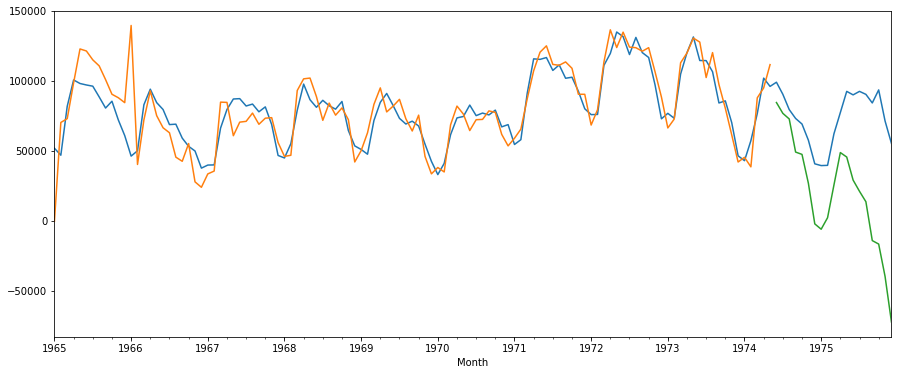

In [54]:
plt.figure(figsize=(15,6))
ts['monthly housing'].plot()
prediction.plot()
forecast.plot()

In [58]:
print('prediction loss: \t%0.4f' % 
      qualityMACAPE(ts['monthly housing'].loc['1968':ts_train_point], prediction['1968':ts_train_point]))
print('forecast loss: \t\t%0.4f' % 
      qualityMACAPE(ts['monthly housing'].loc[ts_train_point:'1975-02'], prediction[ts_train_point:'1975-02']))

prediction loss: 	0.0986
forecast loss: 		0.1493
